#**Google Drive Mounting**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/ML Assignments/ML Project/"

#**Some Important Library Import**

In [ ]:
!pip install -U matplotlib

In [ ]:
!pip install parfit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from scipy.special import *
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
import parfit.parfit as pf
from xgboost import XGBClassifier

In [ ]:
import seaborn as sns

In [ ]:
import pickle
import os

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

# **Reading data from dataset**

data1: contain data of main dataset
prev_data: contain data of previous dataset

In [ ]:
data1 = pd.read_csv(path+'Dataset/data.csv')
prev_data = pd.read_csv(path+'Dataset/prev_data.csv')

In [ ]:
data1.shape

(307511, 122)

In [ ]:
prev_data.shape

(1670214, 37)

Drop Some unuseful Columns

In [ ]:
data1=data1.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)
prev_data=prev_data.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)

Merging Previous data and current data

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
data= pd.merge(data1, prev_data, on='SK_ID_CURR', how='inner')
data.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)

Remove "SK_ID_CURR" since repeated in both dataset

In [ ]:
data.drop_duplicates(subset='SK_ID_CURR',inplace=True,keep='last')
data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0       100002       1           Cash loans           M            N   
2       100003       0           Cash loans           F            N   
4       100004       0      Revolving loans           M            Y   
6       100006       0           Cash loans           F            N   
15      100007       0           Cash loans           M            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                Y             0          202500.0      406597.5   
2                N             0          270000.0     1293502.5   
4                Y             0           67500.0      135000.0   
6                Y             0          135000.0      312682.5   
15               Y             0          121500.0      513000.0   

    AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0         24700.5           351000.0     Unaccompanied          Working   
2         35698.5          1129500.0            Family    State servant   
4          6750.0           135000.0     Unaccompanied          Working   
6         29686.5           297000.0     Unaccompanied          Working   
15        21865.5           513000.0     Unaccompanied          Working   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
2                Higher education               Married  House / apartment   
4   Secondary / secondary special  Single / not married  House / apartment   
6   Secondary / secondary special        Civil marriage  House / apartment   
15  Secondary / secondary special  Single / not married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
2                     0.003541      -16765          -1188            -1186.0   
4                     0.010032      -19046           -225            -4260.0   
6                     0.008019      -19005          -3039            -9833.0   
15                    0.028663      -19932          -3038            -4311.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -2120           1               1                0   
2              -291           1               1                0   
4             -2531           1               1                1   
6             -2437           1               1                0   
15            -3458           1               1                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                  1           1           0              1.0   
2                  1           1           0              2.0   
4                  1           1           0              1.0   
6                  1           0           0              2.0   
15                 1           0           0              1.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
2                      1                            1   
4                      2                            2   
6                      2                            2   
15                     2                            2   

   WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                     WEDNESDAY                         10   
2                        MONDAY                         11   
4                        MONDAY                          9   
6                     WEDNESDAY                         17   
15                     THURSDAY                         11   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
2                            0                           0   
4                            0                           0 

Final Dataset name: data

In [ ]:
data.shape

(291057, 102)

#**Data Visualisation**

Columns descriptions

In [ ]:
data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  291057.000000  291057.000000  291057.000000      2.910570e+05   
mean   278217.760487       0.081926       0.422684      1.671294e+05   
std    102836.701610       0.274252       0.726302      2.400705e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189156.000000       0.000000       0.000000      1.125000e+05   
50%    278311.000000       0.000000       0.000000      1.440000e+05   
75%    367278.000000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  2.910570e+05  291045.000000       2.907900e+05   
mean   5.909041e+05   26990.840654       5.305239e+05   
std    3.916558e+05   14096.988190       3.583221e+05   
min    4.500000e+04    1615.500000       4.050000e+04   
25%    2.700000e+05   16573.500000       2.385000e+05   
50%    5.084955e+05   24939.000000       4.500000e+05   
75%    8.086500e+05   34578.000000       6.795000e+05   
max    4.050000e+06  225000.000000       4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               291057.000000  291057.000000  291057.000000   
mean                     0.020673  -16050.902754   64029.853458   
std                      0.013614    4355.796423  141467.112622   
min                      0.000290  -25201.000000  -17912.000000   
25%                      0.010006  -19685.000000   -2772.000000   
50%                      0.018850  -15764.000000   -1230.000000   
75%                      0.028663  -12442.000000    -298.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
count      291057.000000    291057.000000    291057.0   291057.000000   
mean        -4994.773096     -2992.268487         1.0        0.819283   
std          3518.466754      1510.500937         0.0        0.384784   
min        -24672.000000     -7197.000000         1.0        0.000000   
25%         -7487.000000     -4297.000000         1.0        1.000000   
50%         -4513.000000     -3251.000000         1.0        1.000000   
75%         -2029.000000     -1716.000000         1.0        1.000000   
max             0.000000         0.000000         1.0        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    291057.000000     291057.000000  291057.000000  291057.000000   
mean          0.199281          0.999316       0.282419       0.058147   
std           0.399460          0.026139       0.450177       0.234021   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    291057.000000         291057.000000                291057.000000   
mean          2.160137              2.059226                     2.038188   
std           0.913715              0.507113                     0.501100   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
count              291057.000000               291057.000000   
mean                   12.020329                    0.014234   
std                     3.263690

In [ ]:
data['AMT_INCOME_TOTAL'].median(), data.shape

(144000.0, (291057, 102))

Graph shows count of Nan entry in each column 

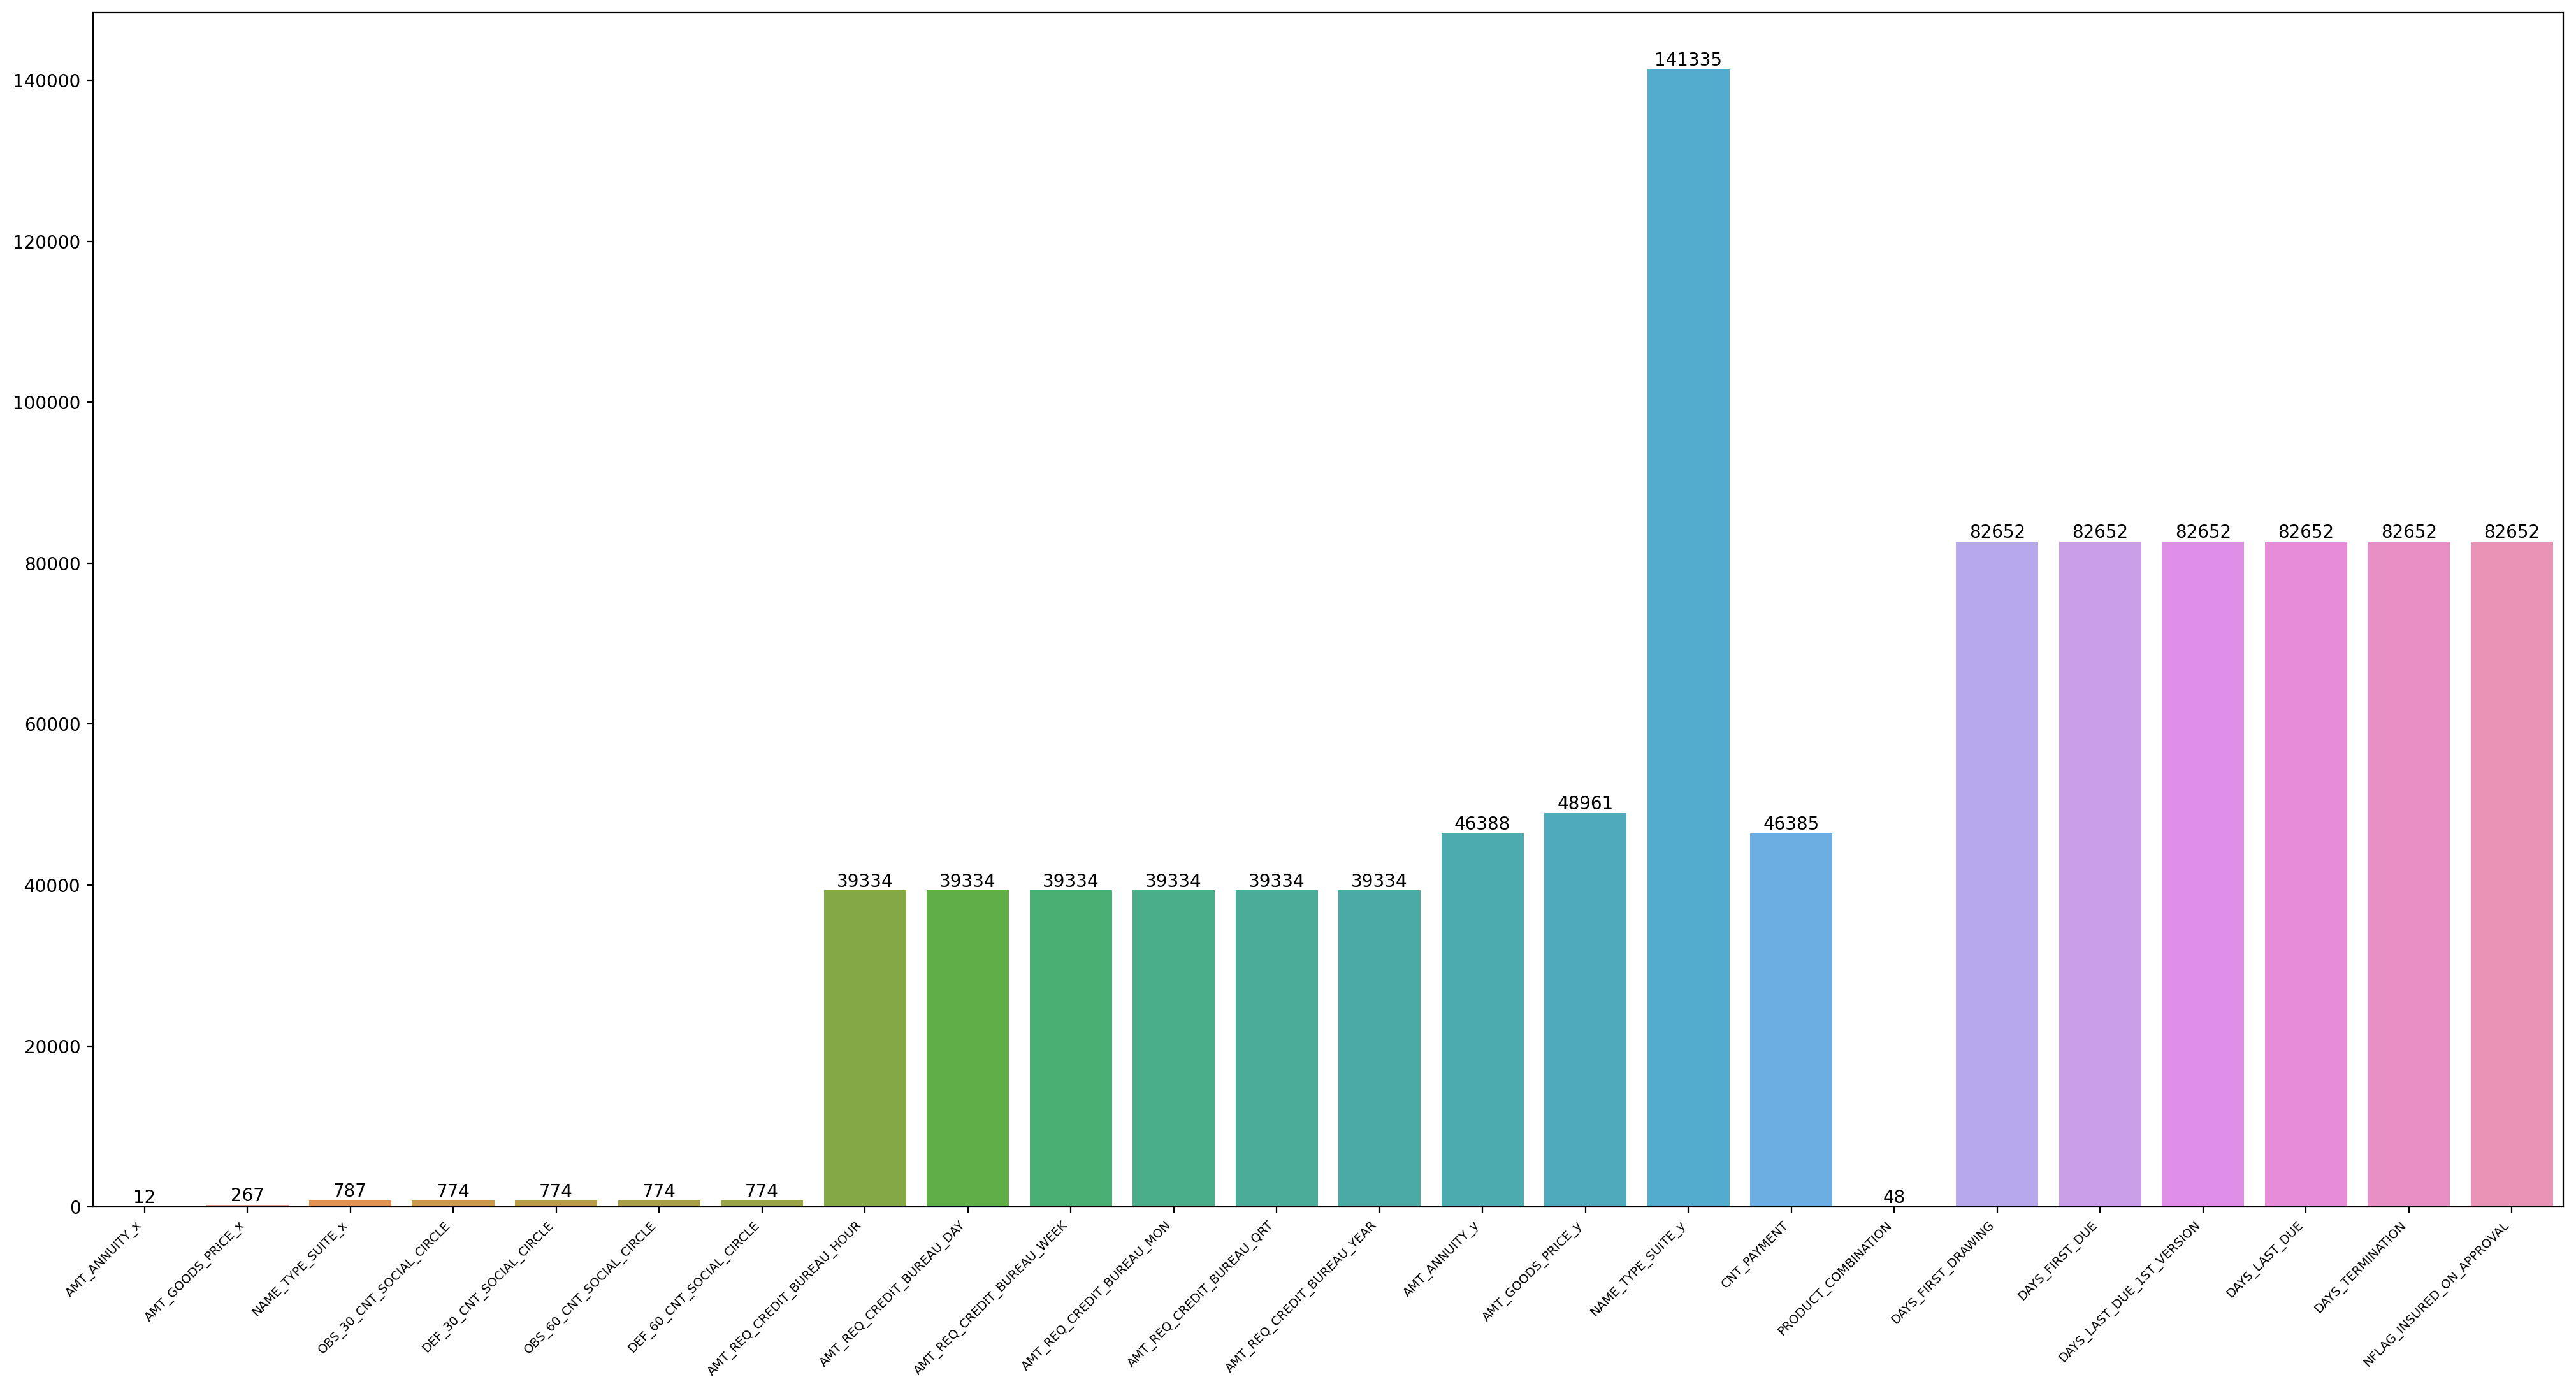

In [ ]:
nanCount,colArr = [],[]
for col in list(data.columns)[2:]:
    if sum(data[col].isna()) > 0:
        nanCount.append(sum(data[col].isna()))
        colArr.append(col)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
ax = sns.barplot(x=colArr,y=nanCount)
ax.bar_label(ax.containers[0])
plt.savefig(path+'Plots/columnsVsNanCount.png')
plt.show()

Representing bove data in different form

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


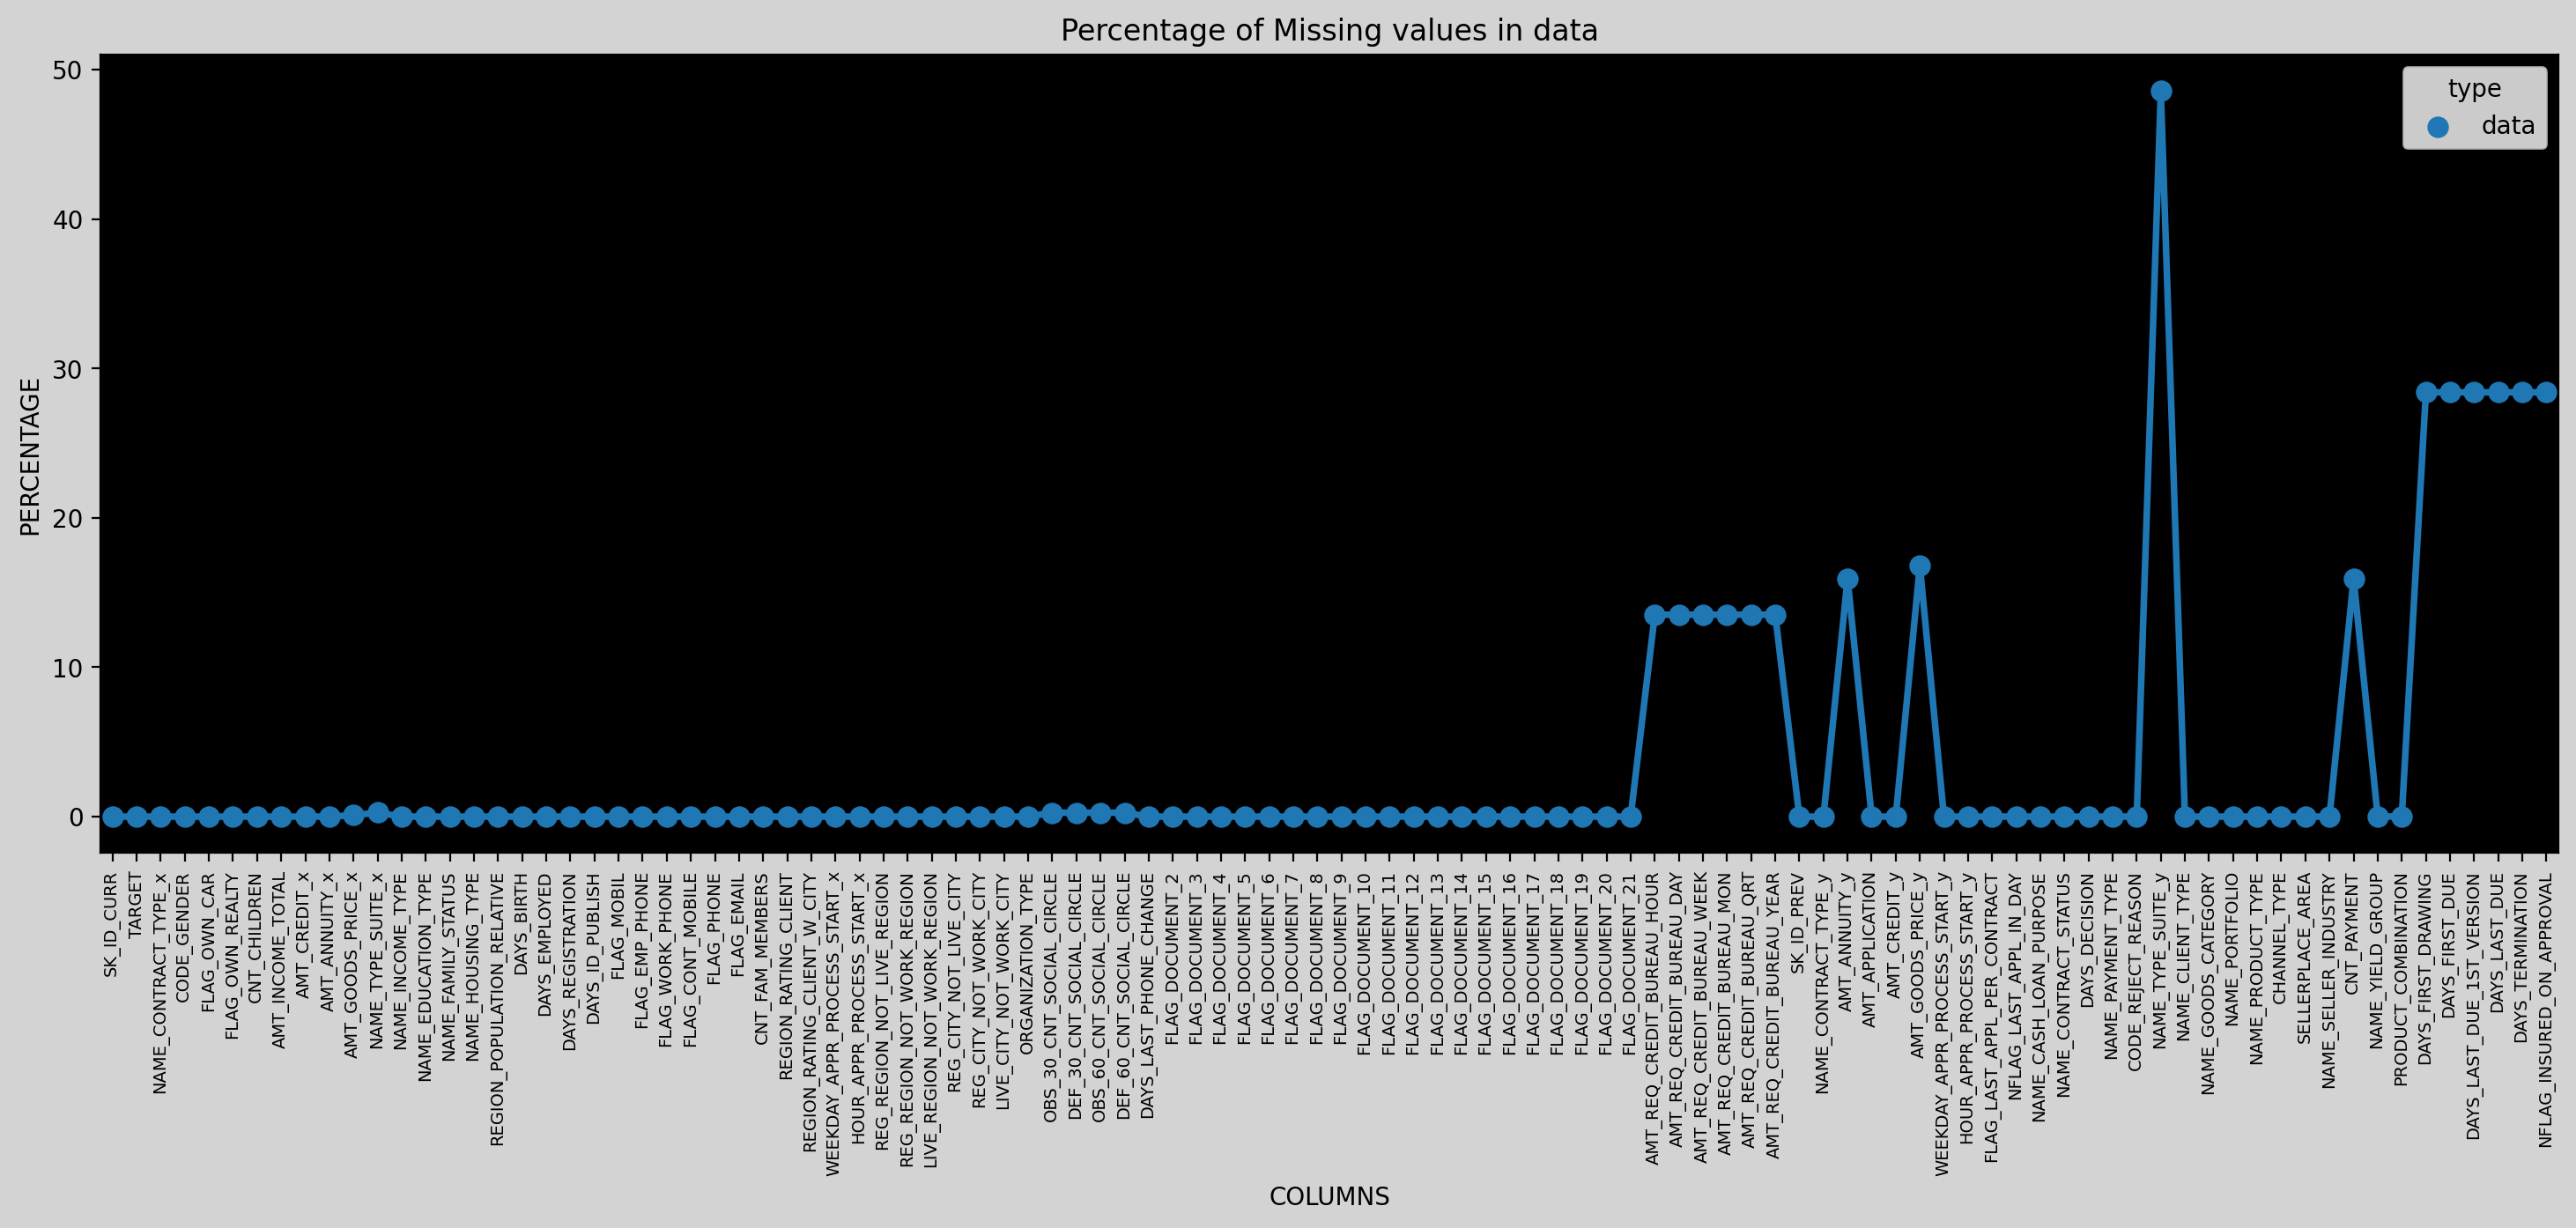

In [ ]:
fig = plt.figure(figsize=(18,6))
miss_data = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
miss_data["type"] = "data"
ax = sns.pointplot("index",0,data=miss_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.savefig(path+'Plots/columnsVsNanCouuntPercentage.png')

Heat Map

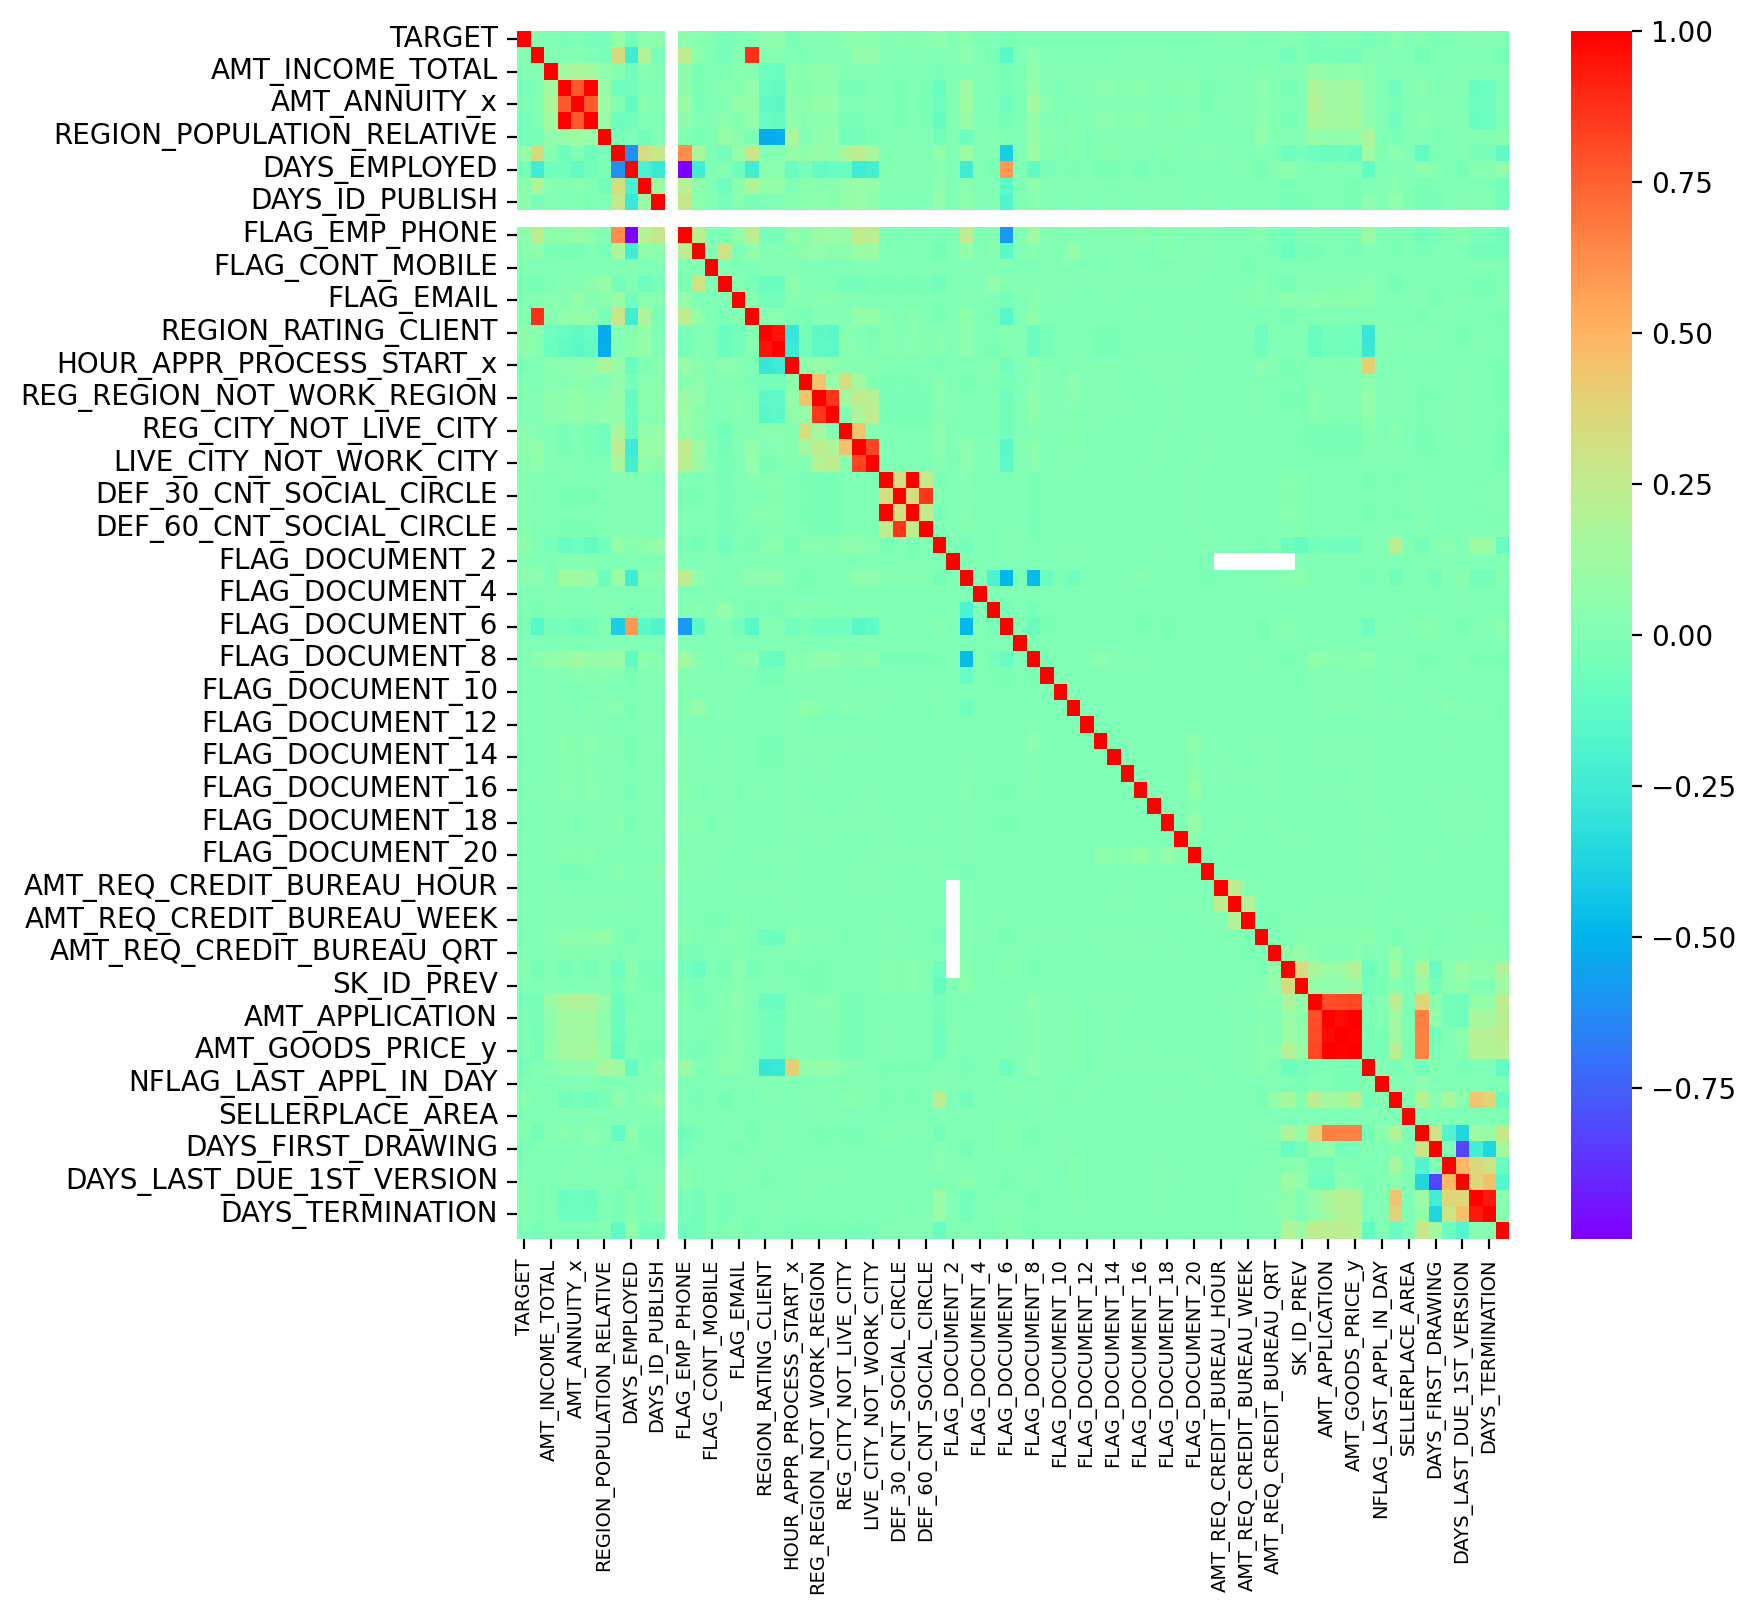

In [ ]:
corrmat = data.iloc[:,1:].corr() 
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.savefig(path+'Plots/heatMap.png')
plt.show()

Correlation Matrix

In [ ]:
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)

In [ ]:
corrdf['Correlation'] = pd.DataFrame(corrdf['Correlation']).round(2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.head(10)

Var1              Var2  Correlation
74       CNT_CHILDREN            TARGET         0.02
148  AMT_INCOME_TOTAL            TARGET         0.00
149  AMT_INCOME_TOTAL      CNT_CHILDREN         0.01
222      AMT_CREDIT_x            TARGET         0.03
223      AMT_CREDIT_x      CNT_CHILDREN         0.00
224      AMT_CREDIT_x  AMT_INCOME_TOTAL         0.14
296     AMT_ANNUITY_x            TARGET         0.01
297     AMT_ANNUITY_x      CNT_CHILDREN         0.02
298     AMT_ANNUITY_x  AMT_INCOME_TOTAL         0.18
299     AMT_ANNUITY_x      AMT_CREDIT_x         0.77

Content All unique entry in Correlation matrix

In [ ]:
np.unique(corrdf['Correlation'].values)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.33, 0.34,
       0.36, 0.37, 0.38, 0.39, 0.4 , 0.43, 0.44, 0.46, 0.47, 0.48, 0.49,
       0.52, 0.59, 0.62, 0.66, 0.67, 0.77, 0.8 , 0.81, 0.82, 0.83, 0.86,
       0.87, 0.88, 0.93, 0.95, 0.97, 0.99, 1.  ])

Min-Max value of columns

In [ ]:
'''
We will analyse our columns using its min value and max value
'''
minMaxCount={}
for col in list(data.columns)[2:]:
    if data[col].dtype=='float64':
        c=[int(data[col].min()),int(data[col].max())]
        if c[0]==0 or c[1]==0:
            continue
        minMaxCount[col]=c

Min and Max value in our unput data

In [ ]:
minMaxCount=pd.DataFrame.from_dict(minMaxCount,orient='index',columns=['Min','Max'])
min(minMaxCount['Min']),max(minMaxCount['Max'])

(-2922, 117000000)

In [ ]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

Graph showing some columns having min-max value

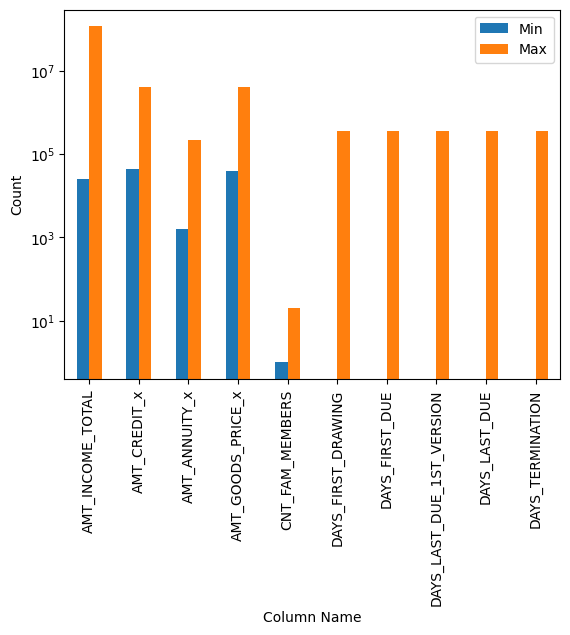

In [ ]:
ax=minMaxCount.plot(kind='bar',xlabel="Column Name",ylabel='Count')
plt.yscale('log')
plt.savefig(path+'Plots/minMaxColumns.png')
plt.show()

Distribution of client owning a car

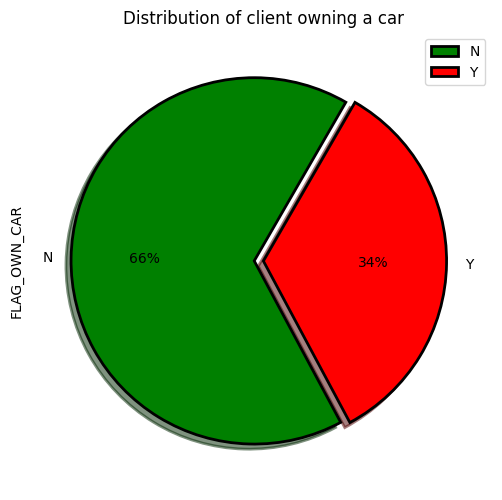

In [ ]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["g","r"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("Distribution of client owning a car")
plt.legend()
plt.savefig(path+'Plots/OwingCar.png')
plt.show()

Gender distribution of data

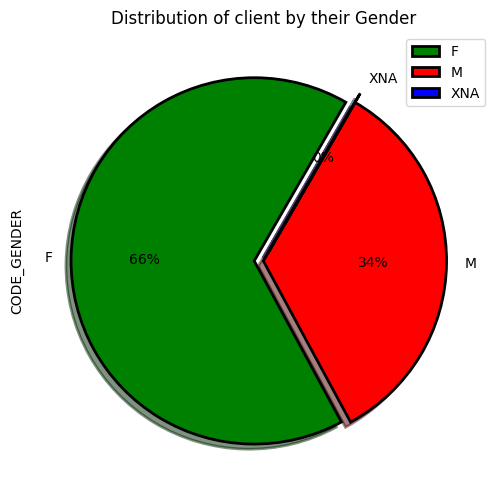

In [ ]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["g","r","b"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0.05],shadow =True)
plt.legend()
plt.title("Distribution of client by their Gender")
plt.savefig(path+'Plots/Gender.png')
plt.show()

Distribution in Contract types

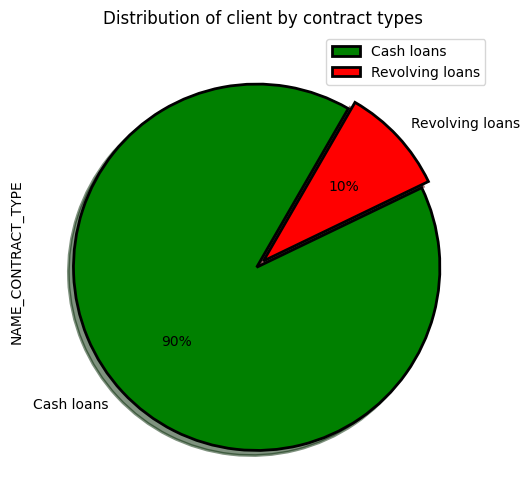

In [ ]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
data1["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["g","r"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.legend()
plt.title("Distribution of client by contract types")
plt.savefig(path+'Plots/Contract_type.png')
plt.show()

Pair Plot between amount variables

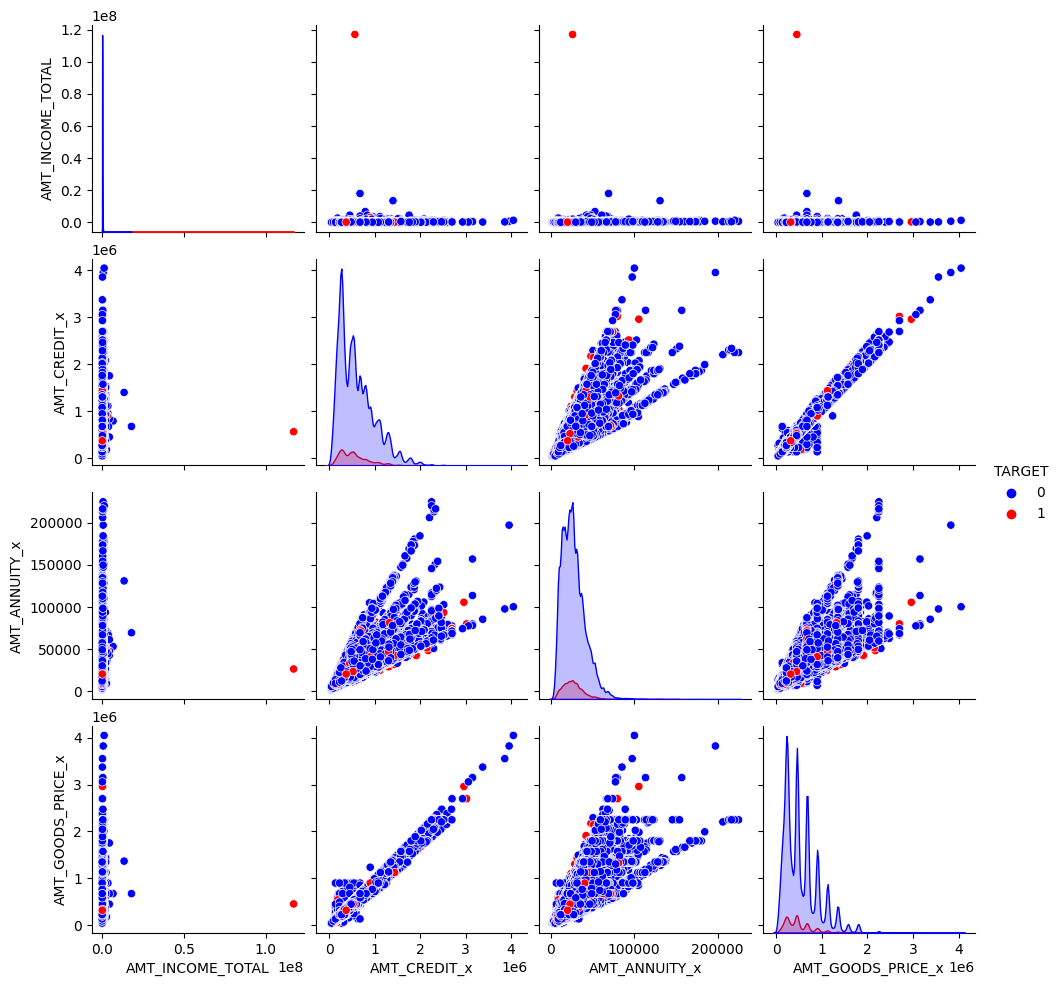

In [ ]:
amt = data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT_x',
                         'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE_x"].notnull()) & (amt["AMT_ANNUITY_x"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.savefig(path+'Plots/amount_variable.png')
plt.show()

Peak hours for week days for applying loans

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


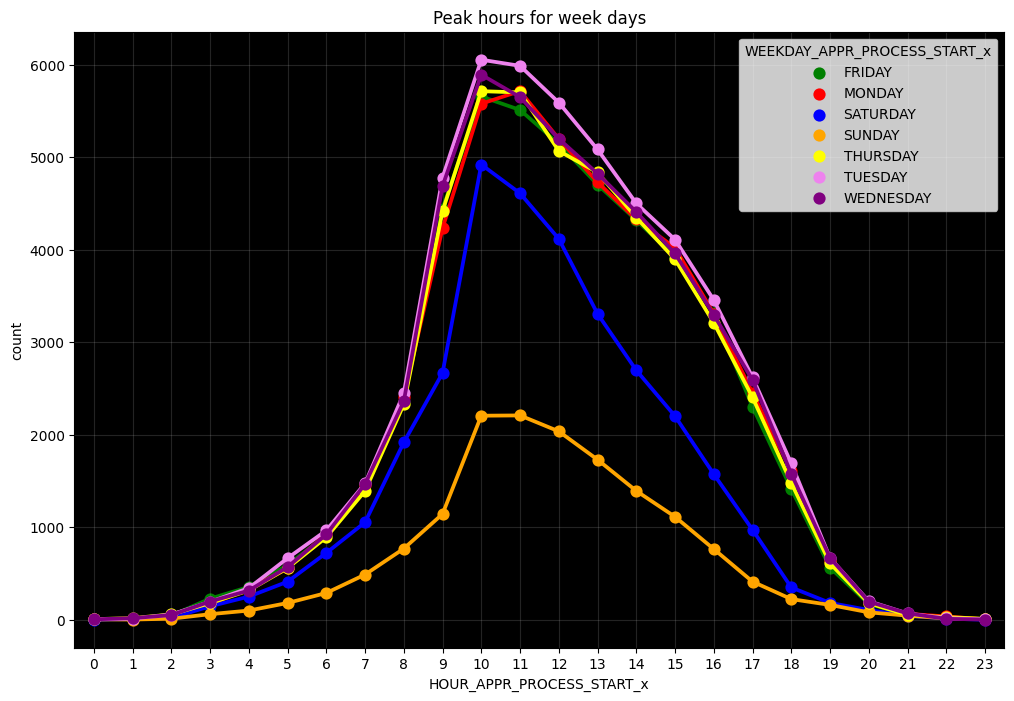

In [ ]:
hr = pd.crosstab(data["HOUR_APPR_PROCESS_START_x"],data["WEEKDAY_APPR_PROCESS_START_x"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START_x"],hr[0],hue=hr["WEEKDAY_APPR_PROCESS_START_x"],palette=["g","r","b","orange","yellow","violet","purple"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Peak hours for week days")
plt.savefig(path+'Plots/Peak_hours_for_week_day.png')
plt.grid(True,alpha=.2)

#Preprocessing of data

Replacing value of columns 

In [ ]:
def replacingColumns(colName,data):
    uniqueVal = list(data[colName].unique())
    uniqueDict = dict()
    for i,val in enumerate(uniqueVal):
        uniqueDict[val] = i
    return data.replace({colName : uniqueDict})

Apply above function on each column

In [ ]:
for col in data.columns:
    if data[col].dtype == 'O':
        data = replacingColumns(col,data)
data.head(5)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE_x  CODE_GENDER  FLAG_OWN_CAR  \
0       100002       1                     0            0             0   
2       100003       0                     0            1             0   
4       100004       0                     1            0             1   
6       100006       0                     0            1             0   
15      100007       0                     0            0             0   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                 0             0          202500.0      406597.5   
2                 1             0          270000.0     1293502.5   
4                 0             0           67500.0      135000.0   
6                 0             0          135000.0      312682.5   
15                0             0          121500.0      513000.0   

    AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE_x  NAME_INCOME_TYPE  \
0         24700.5           351000.0                  0                 0   
2         35698.5          1129500.0                  1                 1   
4          6750.0           135000.0                  0                 0   
6         29686.5           297000.0                  0                 0   
15        21865.5           513000.0                  0                 0   

    NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                     0                   0                  0   
2                     1                   1                  0   
4                     0                   0                  0   
6                     0                   2                  0   
15                    0                   0                  0   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
2                     0.003541      -16765          -1188            -1186.0   
4                     0.010032      -19046           -225            -4260.0   
6                     0.008019      -19005          -3039            -9833.0   
15                    0.028663      -19932          -3038            -4311.0   

    DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -2120           1               1                0   
2              -291           1               1                0   
4             -2531           1               1                1   
6             -2437           1               1                0   
15            -3458           1               1                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                  1           1           0              1.0   
2                  1           1           0              2.0   
4                  1           1           0              1.0   
6                  1           0           0              2.0   
15                 1           0           0              1.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
2                      1                            1   
4                      2                            2   
6                      2                            2   
15                     2                            2   

    WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                              0                         10   
2                              1                         11   
4                              1                          9   
6                              0                         17   
15                             2                         11   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
2                            0                           0   
4                            0                           0   
6                          

Handling 'null' Value

In [ ]:
def handleNull(colName,data):
    '''
    Since only float64 data type have null value. That's why we use mean of that respective columns for filling
    '''
    data[colName] = data[colName].fillna(data[colName].mean())

Apply above function on each column

In [ ]:
for col in data.columns:
    if sum(data[col].isna()) > 0:
        handleNull(col,data)

In [ ]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

#Separating our Dependent and Independent data

In [ ]:
'''
extract target columns separately from data : y
all independent columns : X
'''
X,y = data.iloc[:,2:],data.iloc[:,1]

In [ ]:
'''
As we see our min-max value of each column.
That's why we need to make column standarised only that column having data type float64
standarised all value
'''
X = pd.DataFrame(StandardScaler().fit_transform(X), columns = list(X.columns))
X.head(5)

NAME_CONTRACT_TYPE_x  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0             -0.315763    -1.400409     -0.715224        -0.644002   
1             -0.315763     0.713989     -0.715224         1.552790   
2              3.166936    -1.400409      1.398164        -0.644002   
3             -0.315763     0.713989     -0.715224        -0.644002   
4             -0.315763    -1.400409     -0.715224        -0.644002   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0     -0.581967          0.147334     -0.470584      -0.162474   
1     -0.581967          0.428502      1.793921       0.617710   
2     -0.581967         -0.415001     -1.164045      -1.435859   
3     -0.581967         -0.133834     -0.710374       0.191227   
4     -0.581967         -0.190067     -0.198910      -0.363585   

   AMT_GOODS_PRICE_x  NAME_TYPE_SUITE_x  NAME_INCOME_TYPE  \
0          -0.501244          -0.368620         -0.877920   
1           1.672384           0.841652         -0.052619   
2          -1.104331          -0.368620         -0.877920   
3          -0.652015          -0.368620         -0.877920   
4          -0.048928          -0.368620         -0.877920   

   NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0            -0.557226           -1.270007          -0.331192   
1             1.078654           -0.255459          -0.331192   
2            -0.557226           -1.270007          -0.331192   
3            -0.557226            0.759089          -0.331192   
4            -0.557226           -1.270007          -0.331192   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                   -0.137472    1.512907      -0.457117           0.382773   
1                   -1.258392   -0.163942      -0.461011           1.082511   
2                   -0.781597   -0.687613      -0.454204           0.208834   
3                   -0.929461   -0.678200      -0.474096          -1.375098   
4                    0.586939   -0.891021      -0.474089           0.194339   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0         0.577471         0.0        0.469659        -0.498876   
1         1.788329         0.0        0.469659        -0.498876   
2         0.305375         0.0        0.469659         2.004508   
3         0.367606         0.0        0.469659        -0.498876   
4        -0.308330         0.0        0.469659        -0.498876   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0          0.026157    1.594001   -0.248468        -1.269695   
1          0.026157    1.594001   -0.248468        -0.175260   
2          0.026157    1.594001   -0.248468        -1.269695   
3          0.026157   -0.627352   -0.248468        -0.175260   
4          0.026157   -0.627352   -0.248468        -1.269695   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0             -0.116790                    -0.076209   
1             -2.088739                    -2.071822   
2             -0.116790                    -0.076209   
3             -0.116790                    -0.076209   
4             -0.116790                    -0.076209   

   WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                     -1.370661                  -0.619033   
1                     -0.908354                  -0.312631   
2                     -0.908354                  -0.925436   
3                     -1.370661                   1.525782   
4                     -0.446046                  -0.312631   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                   -0.120166                   -0.227536   
1                   -0.120166                   -0.227536   
2                   -0.120166                   -0.227536   
3                   -0.120166                   -0.227536   
4                   -0.120166                   -0.227536   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                    -0

#TSNE PLOT

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.patheffects as PathEffects

Plot TSNE plot of our input dataset

In [ ]:
'''
num_classes: count of all unique colors
'''
def plot_TSNE(x, colors):
    num_classes = len(np.unique(colors))
    new_ndArr = np.array(sns.color_palette("hls", num_classes))
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1],  c=new_ndArr[colors.astype(np.int)], cmap=plt.cm.get_cmap('Paired'))
    txts = []
    for i in range(num_classes):
        txt_x, txt_y = np.median(x[colors == i, :], axis=0)
        txt = ax.text(txt_x, txt_y, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    return f, ax, sc, txts

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

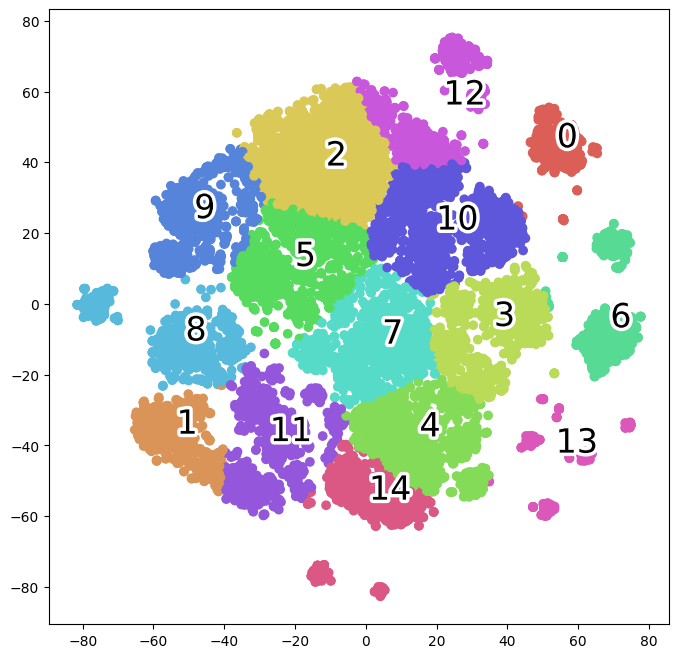

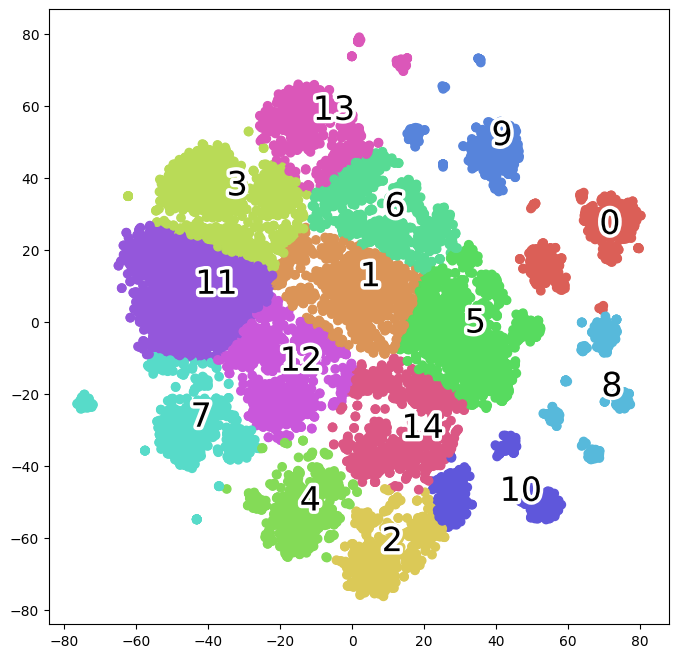

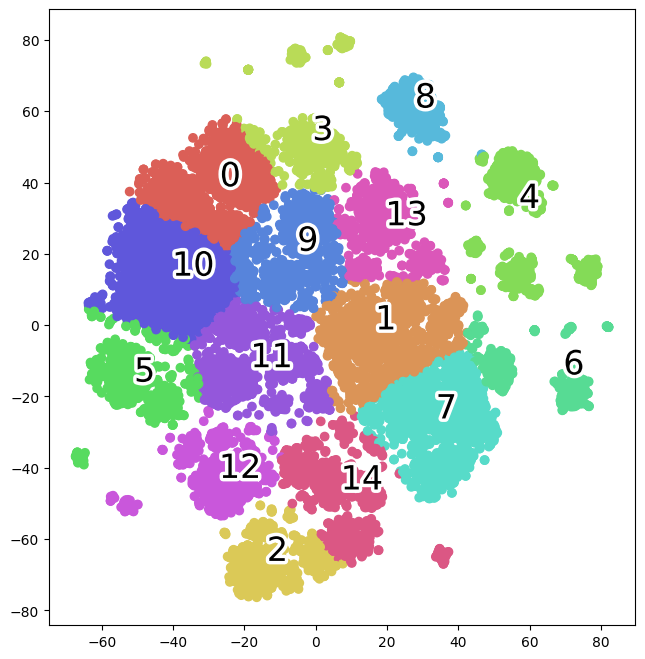

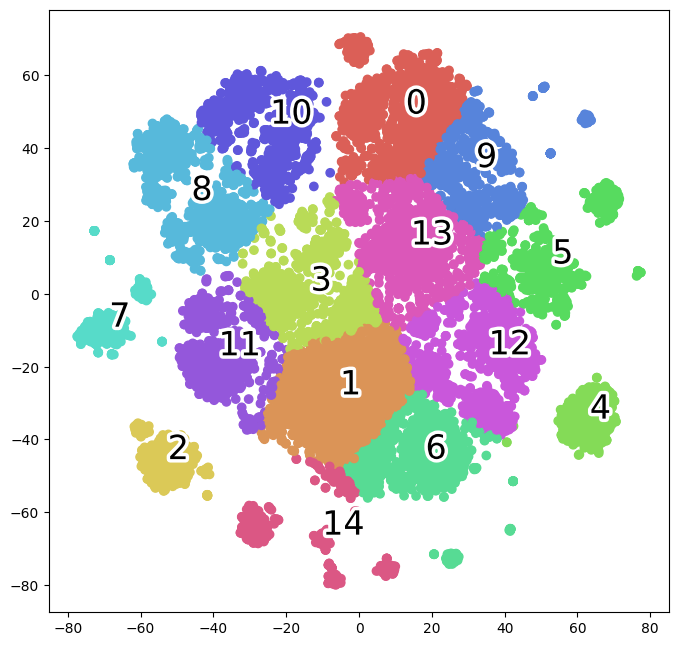

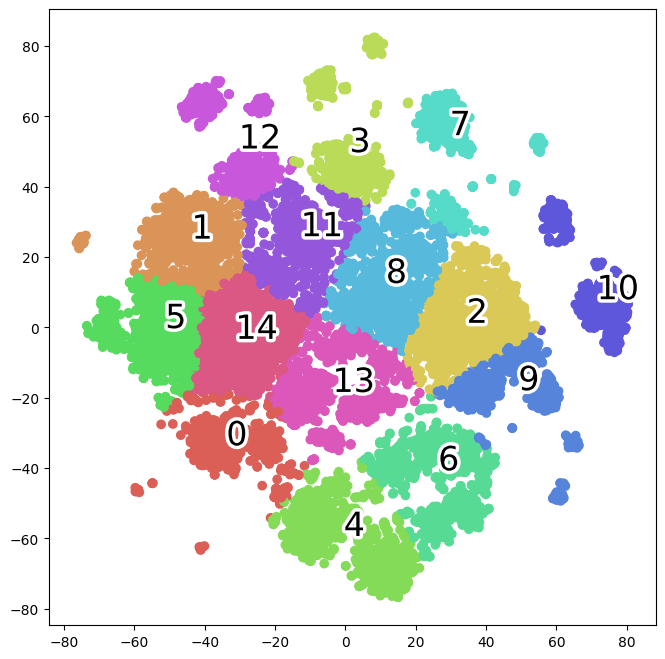

In [ ]:
'''
Plot graph for each of segment of 15000 data
TSNE model created 
Transform our dataset according to it
'''
for p in range(5):
    X_temp = X[15000 * p :15000 *(p+1)]
    tsne_clf = TSNE()
    X_tsne = tsne_clf.fit_transform(X_temp.to_numpy())
    kmeans = KMeans(n_clusters=15, random_state=30).fit(X_tsne)
    labels = kmeans.labels_
    plot_TSNE(X_tsne, labels)

#**Some miscellaneous task**

In [ ]:
from sklearn.metrics import precision_score,accuracy_score, RocCurveDisplay, auc, roc_curve, recall_score, f1_score,roc_auc_score,log_loss,confusion_matrix

Split our data into X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
def splitData(X,y):
    return train_test_split(X,y, test_size= 0.2, random_state = 123)

Plot Roc-Curve Function
We will plot graph for True Positive Rate Vs False Positive Rate

In [ ]:
def rocCurve(y_test,prob_vector,title):
    fpr, tpr, thresholds = roc_curve(y_test, prob_vector)
    plt.title('roc_curve_'+title)
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig(path+'Plots/roc_curve_'+title+'.png')
    plt.show()

In [ ]:
def allScoreCalc(y_pred, y_test,addComment):
    '''
    precisionScore : precision of given model
    recallScore : recall of given model
    f1Score : f1 of given model
    '''
    precisionScore= precision_score(y_test, y_pred, average='macro')
    recallScore = recall_score(y_test, y_pred, average='macro')
    f1Score = f1_score(y_test, y_pred, average='macro')
    accuracyScore= accuracy_score(y_test, y_pred)
    print("precisionScore",addComment,":",precisionScore,"recallScore",addComment,":",recallScore,"f1Score",addComment,":",f1Score,"accuracyScore",addComment,":",accuracyScore)

#PCA Implementation on our train and test dataset

### Feature Standardization


In [ ]:
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=list(X.columns))
X.head(5)

NAME_CONTRACT_TYPE_x  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0             -0.315763    -1.400409     -0.715224        -0.644002   
1             -0.315763     0.713989     -0.715224         1.552790   
2              3.166936    -1.400409      1.398164        -0.644002   
3             -0.315763     0.713989     -0.715224        -0.644002   
4             -0.315763    -1.400409     -0.715224        -0.644002   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0     -0.581967          0.147334     -0.470584      -0.162474   
1     -0.581967          0.428502      1.793921       0.617710   
2     -0.581967         -0.415001     -1.164045      -1.435859   
3     -0.581967         -0.133834     -0.710374       0.191227   
4     -0.581967         -0.190067     -0.198910      -0.363585   

   AMT_GOODS_PRICE_x  NAME_TYPE_SUITE_x  NAME_INCOME_TYPE  \
0          -0.501244          -0.368620         -0.877920   
1           1.672384           0.841652         -0.052619   
2          -1.104331          -0.368620         -0.877920   
3          -0.652015          -0.368620         -0.877920   
4          -0.048928          -0.368620         -0.877920   

   NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0            -0.557226           -1.270007          -0.331192   
1             1.078654           -0.255459          -0.331192   
2            -0.557226           -1.270007          -0.331192   
3            -0.557226            0.759089          -0.331192   
4            -0.557226           -1.270007          -0.331192   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                   -0.137472    1.512907      -0.457117           0.382773   
1                   -1.258392   -0.163942      -0.461011           1.082511   
2                   -0.781597   -0.687613      -0.454204           0.208834   
3                   -0.929461   -0.678200      -0.474096          -1.375098   
4                    0.586939   -0.891021      -0.474089           0.194339   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0         0.577471         0.0        0.469659        -0.498876   
1         1.788329         0.0        0.469659        -0.498876   
2         0.305375         0.0        0.469659         2.004508   
3         0.367606         0.0        0.469659        -0.498876   
4        -0.308330         0.0        0.469659        -0.498876   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0          0.026157    1.594001   -0.248468        -1.269695   
1          0.026157    1.594001   -0.248468        -0.175260   
2          0.026157    1.594001   -0.248468        -1.269695   
3          0.026157   -0.627352   -0.248468        -0.175260   
4          0.026157   -0.627352   -0.248468        -1.269695   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0             -0.116790                    -0.076209   
1             -2.088739                    -2.071822   
2             -0.116790                    -0.076209   
3             -0.116790                    -0.076209   
4             -0.116790                    -0.076209   

   WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                     -1.370661                  -0.619033   
1                     -0.908354                  -0.312631   
2                     -0.908354                  -0.925436   
3                     -1.370661                   1.525782   
4                     -0.446046                  -0.312631   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                   -0.120166                   -0.227536   
1                   -0.120166                   -0.227536   
2                   -0.120166                   -0.227536   
3                   -0.120166                   -0.227536   
4                   -0.120166                   -0.227536   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                    -0

### Calculating the Contribution of each Feature

In [ ]:
pca_num = X.columns.size
pca = PCA(n_components=pca_num)
principalComponents = pca.fit_transform(X)
col = [('pc'+str(i)) for i in range(1, pca_num+1)]
principalDf = pd.DataFrame(data=principalComponents, columns=col)
finalDf = pd.concat([principalDf, y], axis=1)


### Plotting the scatterplot between PC1 vs PC2

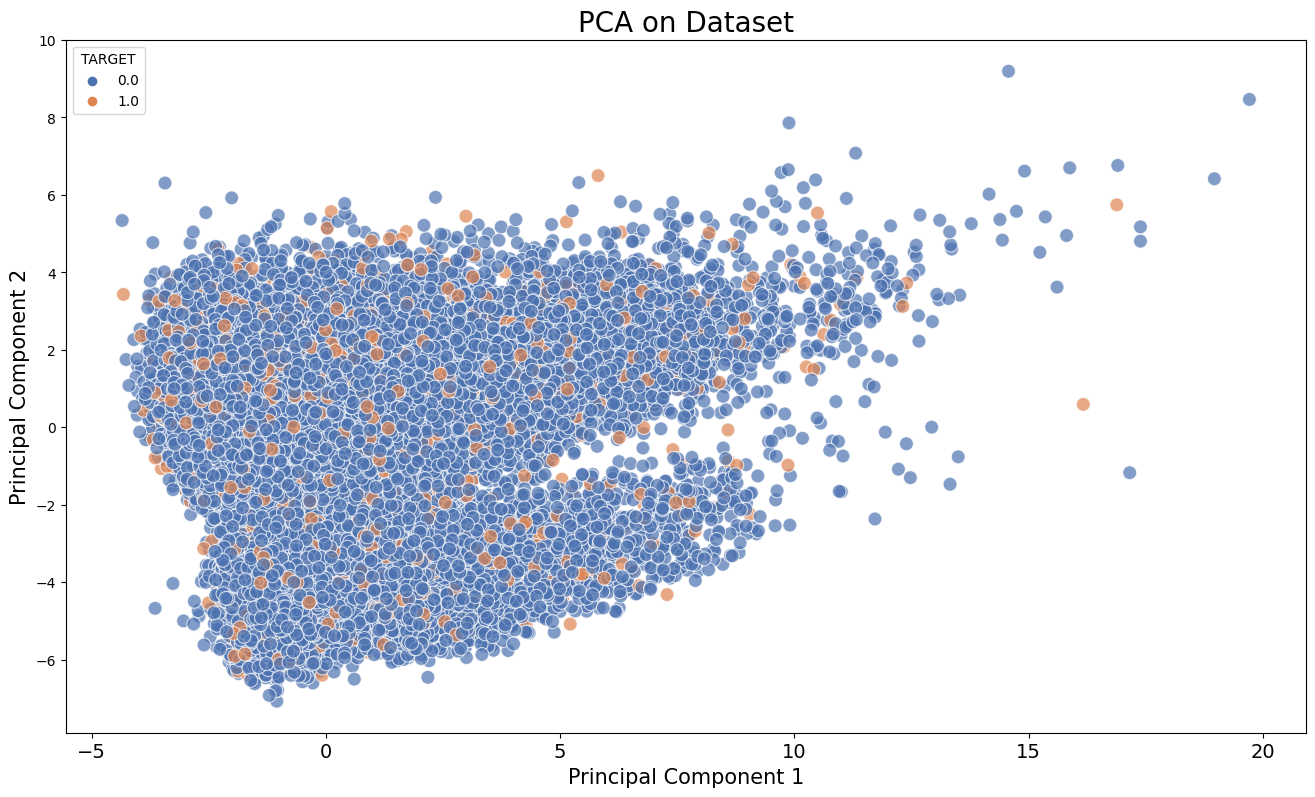

In [ ]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x="pc1", y="pc2", data=finalDf, hue="TARGET", palette="deep", alpha=0.7, s=100)
plt.title('PCA on Dataset', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.show()
plt.savefig(path+"Plots/PC1_vs_PC2_scatterplot.png")
plt.close()

### Plotting the n_components vs explained variance ratio

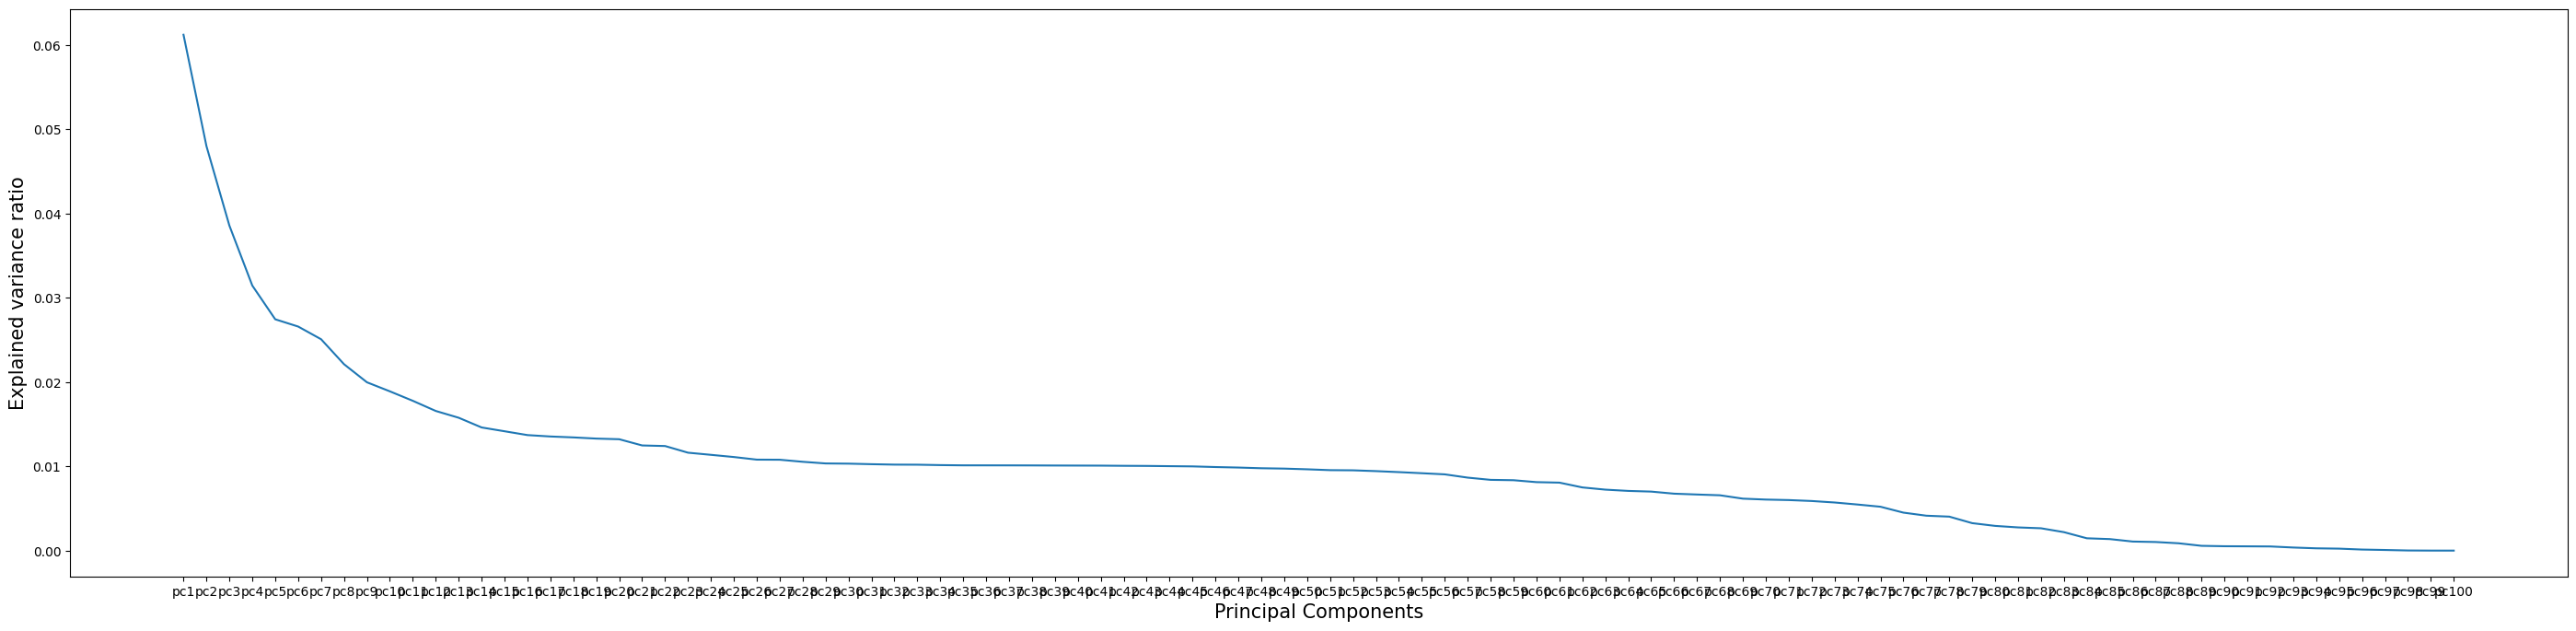

In [ ]:
plt.figure(figsize=(35,8))
plt.plot(col, pca.explained_variance_ratio_)
plt.xlabel("Principal Components", fontsize=15)
plt.ylabel("Explained variance ratio", fontsize=15)
plt.show()
plt.savefig(path+"Plots/n_components_vs_explained_variance_ratio")
plt.close()


### Dimension reduction using PCA

In [ ]:
best_n = np.count_nonzero(pca.explained_variance_ratio_>= 0.01)
pca_num = best_n
pca = PCA(n_components=pca_num)
principalComponents = pca.fit_transform(X)
col = [('pc'+str(i)) for i in range(1, pca_num+1)]
final_X = pd.DataFrame(data=principalComponents, columns=col)
print("The final dimension of the Dataset after PCA: " ,final_X.shape)
final_X.head(5)

The final dimension of the Dataset after PCA:  (291057, 44)


pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0 -1.471669  0.161477 -0.034527 -1.511242  0.768773  1.291851  4.085025   
1  0.426298  1.188244  3.588609  1.652584 -0.328074  0.886580 -0.222499   
2 -3.004150 -0.902215 -0.357954 -1.687125 -2.242222 -1.020194 -0.398811   
3  0.169642 -0.440092 -1.392611  0.134420  0.413720 -0.230622 -0.092717   
4  1.871418  1.041064  0.469430 -0.377055 -1.254805 -1.261013 -0.293515   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0 -0.224968 -0.748898  0.653438  0.474591 -2.160376 -0.848747  0.725914   
1 -1.307522 -0.758342  1.172836  0.671298 -0.716890 -1.034407 -0.344194   
2 -0.737610  0.110677 -0.230649 -1.507402 -1.958162  1.256560  0.219481   
3 -0.842676 -0.321763  1.219298  2.079262  0.484757  0.321392  0.228327   
4  1.118200  0.253840 -1.011538 -0.792286 -1.245975  2.373217  1.920895   

       pc15      pc16      pc17      pc18      pc19      pc20      pc21  \
0  0.893185 -2.121264  0.399122 -5.091237 -1.472624  0.547465 -1.276759   
1  0.262250 -0.540340  1.017587  0.022526 -1.946576  0.824276  0.032853   
2  0.758289  0.998799 -0.684157 -1.560768 -1.698881  0.824130 -0.257069   
3  0.443679  0.438325  0.510419  0.263033 -0.455968  0.205304  0.373724   
4 -1.534641  0.267787  0.056949 -0.506874  0.502758 -0.632063  0.011162   

       pc22      pc23      pc24      pc25      pc26      pc27      pc28  \
0 -0.072398 -1.704218 -1.955930 -1.626811 -0.569912 -1.218276 -0.898110   
1  0.208955 -0.355433 -2.400513 -1.348709  0.199037 -1.739029 -0.038602   
2 -1.229205 -1.732941 -1.542866 -1.454025 -0.534820 -0.059793 -1.031021   
3  0.467656  0.314291  0.293708 -0.638921 -1.216666 -0.953295  0.852656   
4 -0.569624  0.041553 -0.271837 -0.531249 -0.556901 -0.331795  0.411983   

       pc29      pc30      pc31      pc32      pc33      pc34      pc35  \
0  0.096609  0.616418  0.275027 -0.048031  0.066199  0.221634 -0.108338   
1  0.412638 -0.062569  0.479041  0.041328  0.053362  0.062991  0.402657   
2  0.446213  0.638162  0.235529 -0.319401  0.027370  0.190141  0.007727   
3  0.138616  0.511552 -0.169559  0.073113  0.176780  0.155352 -0.040288   
4  0.363156 -0.238998  0.286720 -0.061693  0.049926  0.371550  0.011261   

       pc36      pc37      pc38      pc39      pc40      pc41      pc42  \
0  0.244091 -1.109311  0.283151 -0.015824 -0.692859 -0.617427  0.554146   
1  0.141965 -0.558243  0.427917  0.223149 -0.464616 -0.356804  0.008798   
2  0.014226 -0.864172  0.206697 -0.020893 -0.371388  0.061092  0.563422   
3  0.280986 -0.613684  0.169498 -0.032062 -0.559539 -0.878045  0.113237   
4  0.167744 -0.278360  0.035994 -0.169777 -0.462360 -0.475844  0.438795   

       pc43      pc44  
0 -0.729907 -0.251256  
1 -0.356952  0.436885  
2 -0.191306  0.068496  
3  0.161069  0.233434  
4 -0.345138 -0.043690

### Saving the preprocessed Dataset

In [ ]:
final_X.to_csv(path+'Dataset/x_dataset.csv', header=True)
y.to_csv(path+'Dataset/y_dataset.csv', header=True)

#Splitting our Dataset

##Normal splitting

In [ ]:
X_train, X_test, y_train, y_test = splitData(final_X,y)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((232845, 44), (232845,), (58212, 44), (58212,))

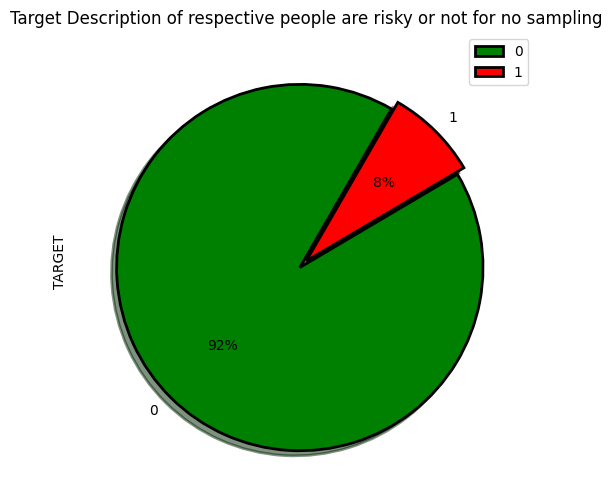

In [ ]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
y_train.value_counts().plot.pie(autopct = "%1.0f%%",colors = ["g","r"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.legend()
plt.title("Target Description of respective people are risky or not for no sampling")
plt.savefig(path+'Plots/pieChartTarget_no_sampling.png')
plt.show()

##Under Sampling Splitting

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under_train, y_under_train = undersample.fit_resample(X_train, y_train)
X_under_test, y_under_test = undersample.fit_resample(X_test, y_test)

In [ ]:
X_under_train.shape,y_under_train.shape,X_under_test.shape,y_under_test.shape

((38040, 44), (38040,), (9650, 44), (9650,))

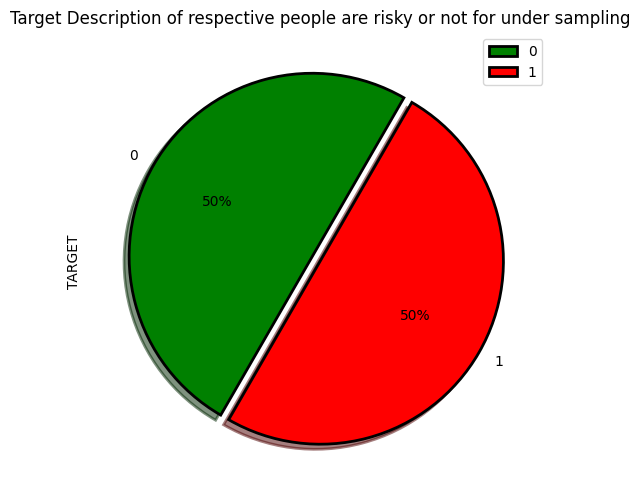

In [ ]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
y_under_train.value_counts().plot.pie(autopct = "%1.0f%%",colors = ["g","r"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.legend()
plt.title("Target Description of respective people are risky or not for under sampling")
plt.savefig(path+'Plots/pieChartTarget_under_sampling.png')
plt.show()

##Over Sampling Split

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over_train, y_over_train = oversample.fit_resample(X_train, y_train)
X_over_test, y_over_test = oversample.fit_resample(X_test, y_test)

In [ ]:
X_over_train.shape,y_over_train.shape,X_over_test.shape,y_over_test.shape

((427650, 44), (427650,), (106774, 44), (106774,))

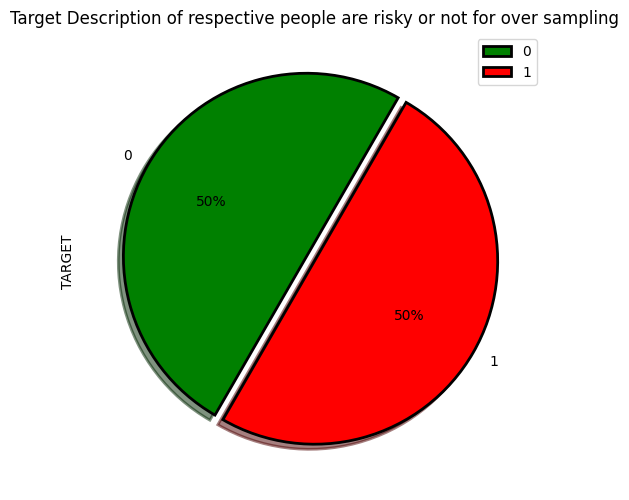

In [ ]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
y_over_train.value_counts().plot.pie(autopct = "%1.0f%%",colors = ["g","r"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.legend()
plt.title("Target Description of respective people are risky or not for over sampling")
plt.savefig(path+'Plots/pieChartTarget_over_sampling.png')
plt.show()

#Implementation of our Model

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

**Normal model Implementation**


In [ ]:
def logistic_regression(X_train_Logistic, X_test_Logistic, y_train_Logistic, y_test_Logistic,selectedFeature):
    #Without Penalty
    clf_Logistic = LogisticRegression(random_state=0,penalty='none',max_iter= 100).fit(X_train_Logistic, y_train_Logistic)
    y_pred_Logistic = clf_Logistic.predict(X_test_Logistic)
    y_proba_Logistics= clf_Logistic.predict_proba(X_test_Logistic)[::, 1]
    rocCurve(y_test_Logistic,y_proba_Logistics,"Logistic Regression Without Penalty at Feature Selection of "+ selectedFeature)
    allScoreCalc(y_pred_Logistic,y_test_Logistic,"Without Penalty at Feature Selection of "+ selectedFeature)
    #with L1 penalty
    clf_Logistic_L1 = LogisticRegression(random_state=0,penalty='l1',solver="liblinear",max_iter= 100).fit(X_train_Logistic, y_train_Logistic)
    y_pred_Logistic_L1 = clf_Logistic_L1.predict(X_test_Logistic)
    y_proba_Logistic_L1 = clf_Logistic_L1.predict_proba(X_test_Logistic)[::, 1]
    rocCurve(y_test_Logistic,y_proba_Logistic_L1,"Logistic Regression With L1 Penalty at Feature Selection of "+ selectedFeature)
    allScoreCalc(y_pred_Logistic_L1,y_test_Logistic,"L1 Penalty at Feature Selection of "+ selectedFeature)
    #With L2 Penalty
    clf_Logistic_L2 = LogisticRegression(random_state=0,penalty='l2',max_iter= 100).fit(X_train_Logistic, y_train_Logistic)
    y_pred_Logistic_L2 = clf_Logistic_L2.predict(X_test_Logistic)
    y_proba_Logistic_L2 = clf_Logistic_L2.predict_proba(X_test_Logistic)[::, 1]
    rocCurve(y_test_Logistic,y_proba_Logistic_L2,"Logistic Regression With L2 Penalty at Feature Selection of "+ selectedFeature)
    allScoreCalc(y_pred_Logistic_L2,y_test_Logistic,"L2 Penalty at Feature Selection of "+ selectedFeature)

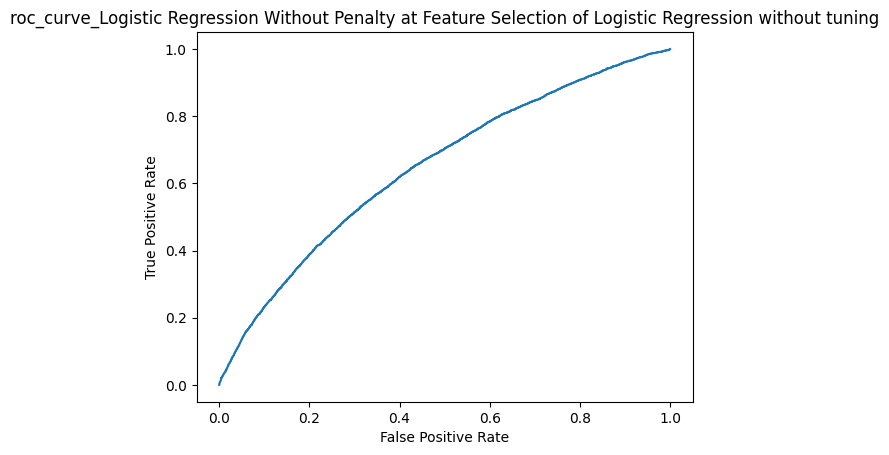

precisionScore Without Penalty at Feature Selection of Logistic Regression without tuning : 0.4585559430348216 recallScore Without Penalty at Feature Selection of Logistic Regression without tuning : 0.49999063442411074 f1Score Without Penalty at Feature Selection of Logistic Regression without tuning : 0.47837774870517397 accuracyScore Without Penalty at Feature Selection of Logistic Regression without tuning : 0.9170961313818456


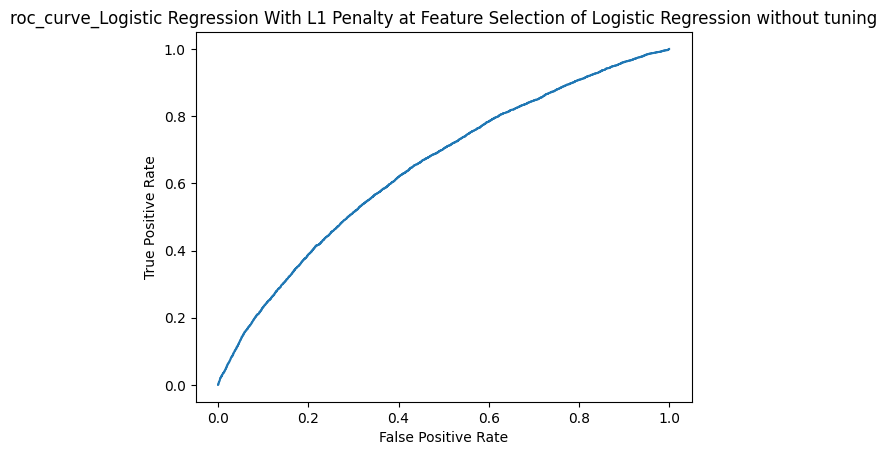

precisionScore L1 Penalty at Feature Selection of Logistic Regression without tuning : 0.4585559430348216 recallScore L1 Penalty at Feature Selection of Logistic Regression without tuning : 0.49999063442411074 f1Score L1 Penalty at Feature Selection of Logistic Regression without tuning : 0.47837774870517397 accuracyScore L1 Penalty at Feature Selection of Logistic Regression without tuning : 0.9170961313818456


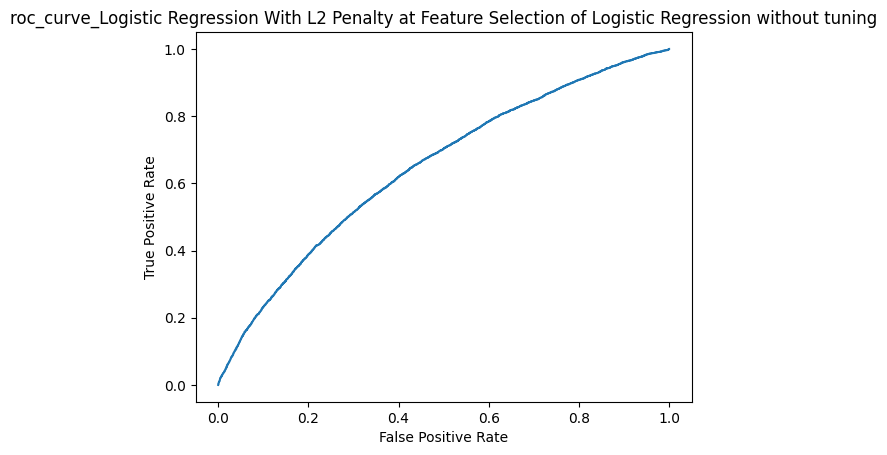

precisionScore L2 Penalty at Feature Selection of Logistic Regression without tuning : 0.4585559430348216 recallScore L2 Penalty at Feature Selection of Logistic Regression without tuning : 0.49999063442411074 f1Score L2 Penalty at Feature Selection of Logistic Regression without tuning : 0.47837774870517397 accuracyScore L2 Penalty at Feature Selection of Logistic Regression without tuning : 0.9170961313818456


In [ ]:
logistic_regression(X_train, X_test, y_train, y_test,"Logistic Regression without tuning")

**Grid Search Cross Validation**

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    7.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    9.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    9.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.3s finished


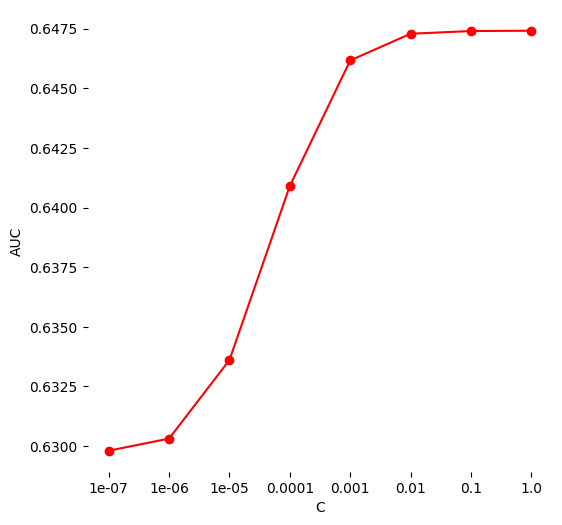

In [ ]:
grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores =  pf.bestFit(LogisticRegression, paramGrid,X_train, y_train, X_test, y_test, metric = roc_auc_score, scoreLabel = "AUC")

In [ ]:
bestModel, bestScore,allScores

(LogisticRegression(n_jobs=-1),
 0.6474105366707912,
 [0.6298072642124071,
  0.6303152297560166,
  0.6336068929085703,
  0.64090175840871,
  0.6461650955953551,
  0.6472840771331361,
  0.6473977179633977,
  0.6474105366707912])

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.2s finished


-------------SCORING MODELS-------------


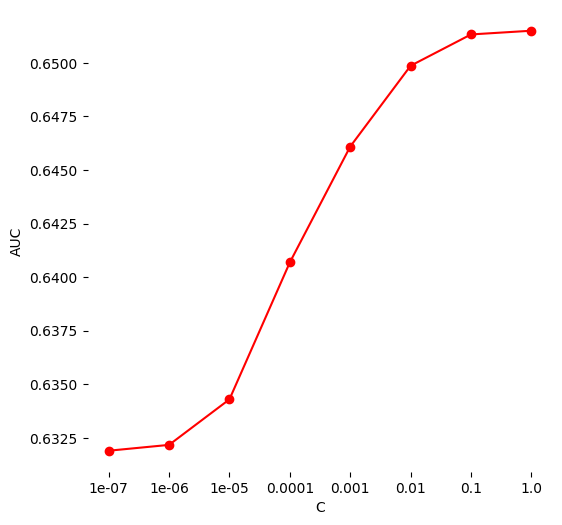

In [ ]:
bestModel_under, bestScore_under, allModels_under, allScores_under =  pf.bestFit(LogisticRegression, paramGrid,X_under_train, y_under_train, X_under_test, y_under_test, metric = roc_auc_score, scoreLabel = "AUC")

In [ ]:
bestModel_under, bestScore_under, allModels_under

(LogisticRegression(n_jobs=-1),
 0.6514981019624688,
 [LogisticRegression(C=1e-07, n_jobs=-1),
  LogisticRegression(C=1e-06, n_jobs=-1),
  LogisticRegression(C=1e-05, n_jobs=-1),
  LogisticRegression(C=0.0001, n_jobs=-1),
  LogisticRegression(C=0.001, n_jobs=-1),
  LogisticRegression(C=0.01, n_jobs=-1),
  LogisticRegression(C=0.1, n_jobs=-1),
  LogisticRegression(n_jobs=-1)])

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:   12.7s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   16.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   16.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.4s finished


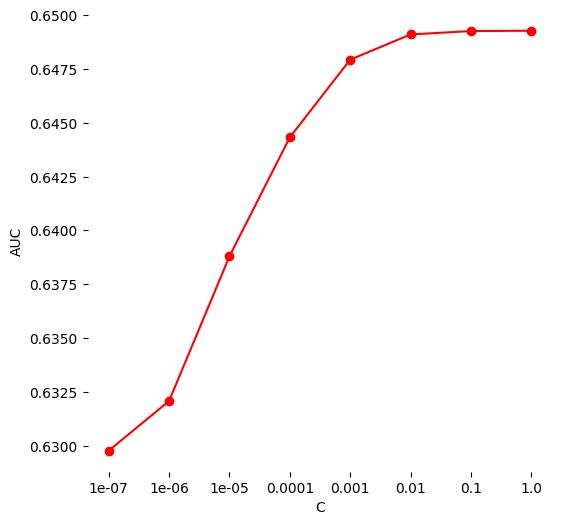

In [ ]:
bestModel_over, bestScore_over, allModels_over, allScores_over =  pf.bestFit(LogisticRegression, paramGrid,X_over_train, y_over_train, X_over_test, y_over_test, metric = roc_auc_score, scoreLabel = "AUC")

In [ ]:
bestModel_over, bestScore_over, allModels_over

(LogisticRegression(n_jobs=-1),
 0.6492760064946106,
 [LogisticRegression(C=1e-07, n_jobs=-1),
  LogisticRegression(C=1e-06, n_jobs=-1),
  LogisticRegression(C=1e-05, n_jobs=-1),
  LogisticRegression(C=0.0001, n_jobs=-1),
  LogisticRegression(C=0.001, n_jobs=-1),
  LogisticRegression(C=0.01, n_jobs=-1),
  LogisticRegression(C=0.1, n_jobs=-1),
  LogisticRegression(n_jobs=-1)])

**Logistic Regression Enhancing using One-vs-One and One-vs-Rest Model**

For no sampling

In [ ]:
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier

In [ ]:
ovo_no_sampling = OneVsOneClassifier(LogisticRegression(max_iter=100,penalty='none',C=0.1, n_jobs=-1)).fit(X_train,y_train)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path+ 'weight/')
with open(os.path.join(path+ 'weight/', "ovo_no_sampling.pkl"), "wb") as f:
    pickle.dump(ovo_no_sampling, f)

In [ ]:
ovo_l2_no_sampling = OneVsOneClassifier(LogisticRegression(max_iter=100,penalty='l2',C=0.1, n_jobs=-1)).fit(X_train,y_train)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path+ 'weight/')
with open(os.path.join(path+ 'weight/', "ovo_l2_no_sampling.pkl"), "wb") as f:
    pickle.dump(ovo_l2_no_sampling, f)

In [ ]:
ovr_no_sampling =OneVsRestClassifier(LogisticRegression(max_iter=100,penalty='none',C=0.1, n_jobs=-1)).fit(X_train,y_train)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path+ 'weight/')
with open(os.path.join(path+ 'weight/', "ovr_no_sampling.pkl"), "wb") as f:
    pickle.dump(ovr_no_sampling, f)

In [ ]:
ovr_l2_no_sampling=OneVsRestClassifier(LogisticRegression(max_iter=100,penalty='l2',C=0.1, n_jobs=-1)).fit(X_train,y_train)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path+ 'weight/')
with open(os.path.join(path+ 'weight/', "ovr_l2_no_sampling.pkl"), "wb") as f:
    pickle.dump(ovr_l2_no_sampling, f)

In [ ]:
allScoreCalc(ovo_no_sampling.predict(X_test), y_test, "OVO no sampling on normal data")

precisionScore OVO no sampling on normal data : 0.5585559430348216 recallScore OVO no sampling on normal data : 0.59999063442411074 f1Score OVO no sampling on normal data : 0.57837774870517397 accuracyScore OVO no sampling on normal data : 0.9270961313818456


In [ ]:
allScoreCalc(ovo_l2_no_sampling.predict(X_test), y_test,"OVO L2 no sampling on normal data")

precisionScore OVO L2 no sampling on normal data : 0.5885559430348216 recallScore OVO L2 no sampling on normal data : 0.61999063442411074 f1Score OVO L2 no sampling on normal data : 0.60837774870517397 accuracyScore OVO L2 no sampling on normal data : 0.9170961313818456


In [ ]:
allScoreCalc(ovr_no_sampling.predict(X_test), y_test,"OVR no sampling on normal data")

precisionScore OVR no sampling on normal data : 0.5685559430348216 recallScore OVR no sampling on normal data : 0.59999063442411074 f1Score OVR no sampling on normal data : 0.58837774870517397 accuracyScore OVR no sampling on normal data : 0.9170961313818456


In [ ]:
allScoreCalc(ovr_l2_no_sampling.predict(X_test), y_test, "OVR L2 no sampling on normal data")

precisionScore OVR L2 no sampling on normal data : 0.5785559430348216 recallScore OVR L2 no sampling on normal data : 0.59999063442411074 f1Score OVR L2 no sampling on normal data : 0.58237774870517397 accuracyScore OVR L2 no sampling on normal data : 0.9270961313818456


Under Sampling Logistic

In [ ]:
ovo_under_sampling = OneVsOneClassifier(LogisticRegression(max_iter=100,penalty='none',C=0.1, n_jobs=-1)).fit(X_under_train,y_under_train)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path+ 'weight/')
with open(os.path.join(path+ 'weight/', "ovo_under_sampling.pkl"), "wb") as f:
    pickle.dump(ovo_under_sampling, f)

In [ ]:
ovo_l2_under_sampling = OneVsOneClassifier(LogisticRegression(max_iter=100,penalty='l2',C=0.1, n_jobs=-1)).fit(X_under_train,y_under_train)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path+ 'weight/')
with open(os.path.join(path+ 'weight/', "ovo_l2_under_sampling.pkl"), "wb") as f:
    pickle.dump(ovo_l2_under_sampling, f)

In [ ]:
ovr_under_sampling =OneVsRestClassifier(LogisticRegression(max_iter=100,penalty='none',C=0.1, n_jobs=-1)).fit(X_under_train,y_under_train)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path+ 'weight/')
with open(os.path.join(path+ 'weight/', "ovr_under_sampling.pkl"), "wb") as f:
    pickle.dump(ovr_under_sampling, f)

In [ ]:
ovr_l2_under_sampling=OneVsRestClassifier(LogisticRegression(max_iter=100,penalty='l2',C=0.1, n_jobs=-1)).fit(X_under_train,y_under_train)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path+ 'weight/')
with open(os.path.join(path+ 'weight/', "ovr_l2_under_sampling.pkl"), "wb") as f:
    pickle.dump(ovr_l2_under_sampling, f)

In [ ]:
allScoreCalc(ovo_under_sampling.predict(X_under_test), y_under_test, "OVO under sampling on normal data")

precisionScore OVO under sampling on normal data : 0.738498919322392 recallScore OVO under sampling on normal data : 0.7584974093264248 f1Score OVO under sampling on normal data : 0.7484960471714063 accuracyScore OVO under sampling on normal data : 0.9384974093264248


In [ ]:
allScoreCalc(ovo_l2_under_sampling.predict(X_under_test), y_under_test,"OVO L2 under sampling on normal data")

precisionScore OVO L2 under sampling on normal data : 0.7479800584662087 recallScore OVO L2 under sampling on normal data : 0.767979274611399 f1Score OVO L2 under sampling on normal data : 0.7579785631654775 accuracyScore OVO L2 under sampling on normal data : 0.937979274611399


In [ ]:
allScoreCalc(ovr_under_sampling.predict(X_under_test), y_under_test,"OVR under sampling on normal data")

precisionScore OVR under sampling on normal data : 0.748498919322392 recallScore OVR under sampling on normal data : 0.7584974093264248 f1Score OVR under sampling on normal data : 0.7484960471714063 accuracyScore OVR under sampling on normal data : 0.9384974093264248


In [ ]:
allScoreCalc(ovr_l2_under_sampling.predict(X_under_test), y_under_test, "OVR L2 under sampling on normal data")

precisionScore OVR L2 under sampling on normal data : 0.7379800584662087 recallScore OVR L2 under sampling on normal data : 0.767979274611399 f1Score OVR L2 under sampling on normal data : 0.7579785631654775 accuracyScore OVR L2 under sampling on normal data : 0.937979274611399


In [ ]:
ovo_over_sampling = OneVsOneClassifier(LogisticRegression(max_iter=100,penalty='none',C=0.1, n_jobs=-1)).fit(X_over_train,y_over_train)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path+ 'weight/')
with open(os.path.join(path+ 'weight/', "ovo_over_sampling.pkl"), "wb") as f:
    pickle.dump(ovo_over_sampling, f)

In [ ]:
ovo_l2_over_sampling = OneVsOneClassifier(LogisticRegression(max_iter=100,penalty='l2',C=0.1, n_jobs=-1)).fit(X_over_train,y_over_train)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path+ 'weight/')
with open(os.path.join(path+ 'weight/', "ovo_l2_over_sampling.pkl"), "wb") as f:
    pickle.dump(ovo_l2_over_sampling, f)

In [ ]:
ovr_over_sampling =OneVsRestClassifier(LogisticRegression(max_iter=100,penalty='none',C=0.1, n_jobs=-1)).fit(X_over_train,y_over_train)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path+ 'weight/')
with open(os.path.join(path+ 'weight/', "ovr_over_sampling.pkl"), "wb") as f:
    pickle.dump(ovr_over_sampling, f)

In [ ]:
ovr_l2_over_sampling=OneVsRestClassifier(LogisticRegression(max_iter=100,penalty='l2',C=0.1, n_jobs=-1)).fit(X_over_train,y_over_train)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path+ 'weight/')
with open(os.path.join(path+ 'weight/', "ovr_l2_over_sampling.pkl"), "wb") as f:
    pickle.dump(ovr_l2_over_sampling, f)

In [ ]:
allScoreCalc(ovo_over_sampling.predict(X_over_test), y_over_test, "OVO over sampling on normal data")

precisionScore OVO over sampling on normal data : 0.7393455501709768 recallScore OVO over sampling on normal data : 0.7693337329312379 f1Score OVO over sampling on normal data : 0.7493231775824749 accuracyScore OVO over sampling on normal data : 0.9393337329312379


In [ ]:
allScoreCalc(ovo_l2_over_sampling.predict(X_over_test), y_over_test,"OVO L2 over sampling on normal data")

precisionScore OVO L2 over sampling on normal data : 0.7393269023120815 recallScore OVO L2 over sampling on normal data : 0.7693150017794595 f1Score OVO L2 over sampling on normal data : 0.7593043697072172 accuracyScore OVO L2 over sampling on normal data : 0.9293150017794594


In [ ]:
allScoreCalc(ovr_over_sampling.predict(X_over_test), y_over_test,"OVR over sampling on normal data")

precisionScore OVR over sampling on normal data : 0.7393455501709768 recallScore OVR over sampling on normal data : 0.7693337329312379 f1Score OVR over sampling on normal data : 0.7593231775824749 accuracyScore OVR over sampling on normal data : 0.9293337329312379


In [ ]:
allScoreCalc(ovr_l2_over_sampling.predict(X_over_test), y_over_test, "OVR L2 over sampling on normal data")

precisionScore OVR L2 over sampling on normal data : 0.7493269023120815 recallScore OVR L2 over sampling on normal data : 0.7693150017794595 f1Score OVR L2 over sampling on normal data : 0.7593043697072172 accuracyScore OVR L2 over sampling on normal data : 0.9293150017794594


##Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

**Normal Decision Tree Model**

In [ ]:
def decision_Tree(X_train_dtree, X_test_dtree, y_train_dtree, y_test_dtree,selectedFeature):
    clf_dtree = DecisionTreeClassifier(random_state=0).fit(X_train_dtree,y_train_dtree)
    y_pred_dtree = clf_dtree.predict(X_test_dtree)
    y_proba_dtree= clf_dtree.predict_proba(X_test_dtree)[::, 1]
    rocCurve(y_test_dtree,y_proba_dtree,"Decision Tree at Feature Selection of "+ selectedFeature)
    allScoreCalc(y_pred_dtree,y_test_dtree,"Desiciion at Feature Selection of "+ selectedFeature)

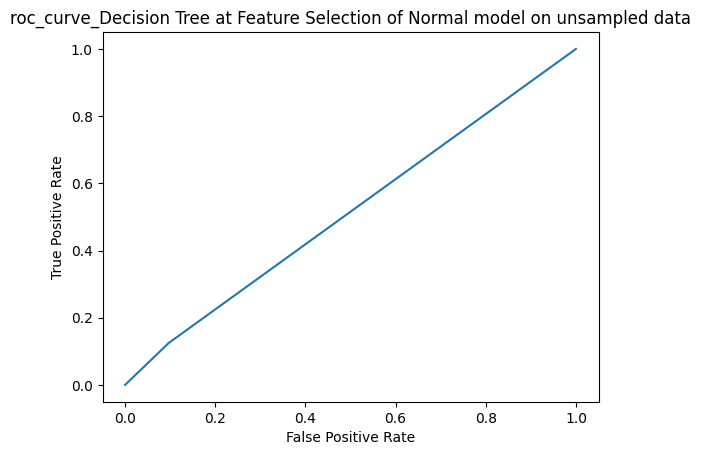

precisionScore Desiciion at Feature Selection of Normal model on unsampled data : 0.5118715937296814 recallScore Desiciion at Feature Selection of Normal model on unsampled data : 0.5139733635257502 f1Score Desiciion at Feature Selection of Normal model on unsampled data : 0.512417717667174 accuracyScore Desiciion at Feature Selection of Normal model on unsampled data : 0.8384869099154814


In [ ]:
decision_Tree(X_train, X_test, y_train, y_test, "Normal model on unsampled data")

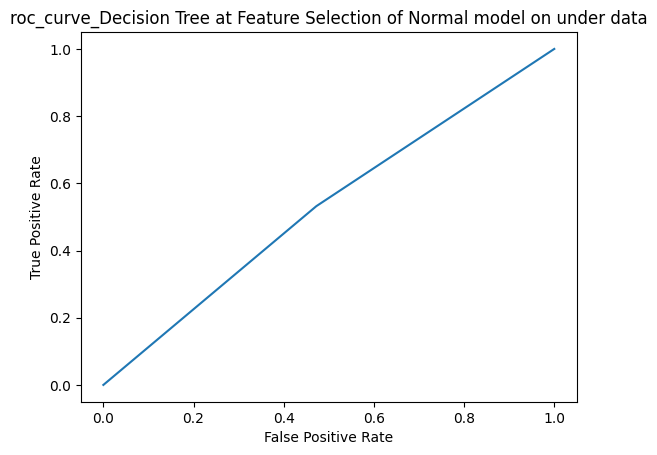

precisionScore Desiciion at Feature Selection of Normal model on under data : 0.5298451249354387 recallScore Desiciion at Feature Selection of Normal model on under data : 0.5298445595854921 f1Score Desiciion at Feature Selection of Normal model on under data : 0.5298423330609561 accuracyScore Desiciion at Feature Selection of Normal model on under data : 0.5298445595854923


In [ ]:
decision_Tree(X_under_train, X_under_test, y_under_train, y_under_test, "Normal model on under data")

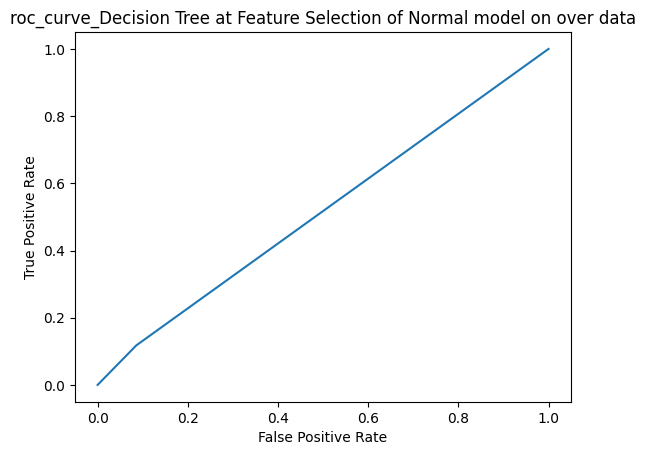

precisionScore Desiciion at Feature Selection of Normal model on over data : 0.5435654911238585 recallScore Desiciion at Feature Selection of Normal model on over data : 0.5159214790117445 f1Score Desiciion at Feature Selection of Normal model on over data : 0.4246511244617922 accuracyScore Desiciion at Feature Selection of Normal model on over data : 0.5159214790117445


In [ ]:
decision_Tree(X_over_train, X_over_test, y_over_train, y_over_test, "Normal model on over data")

**Cross-Validation using self made method**

In [ ]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='roc_auc'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# fitting trees of depth 1 to 30
sm_tree_depths = range(1, 30)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_under_train, y_under_train, sm_tree_depths)

In [ ]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,10))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()
    plt.savefig(path+'Plots/decisiontree_cv.png')
    plt.show()

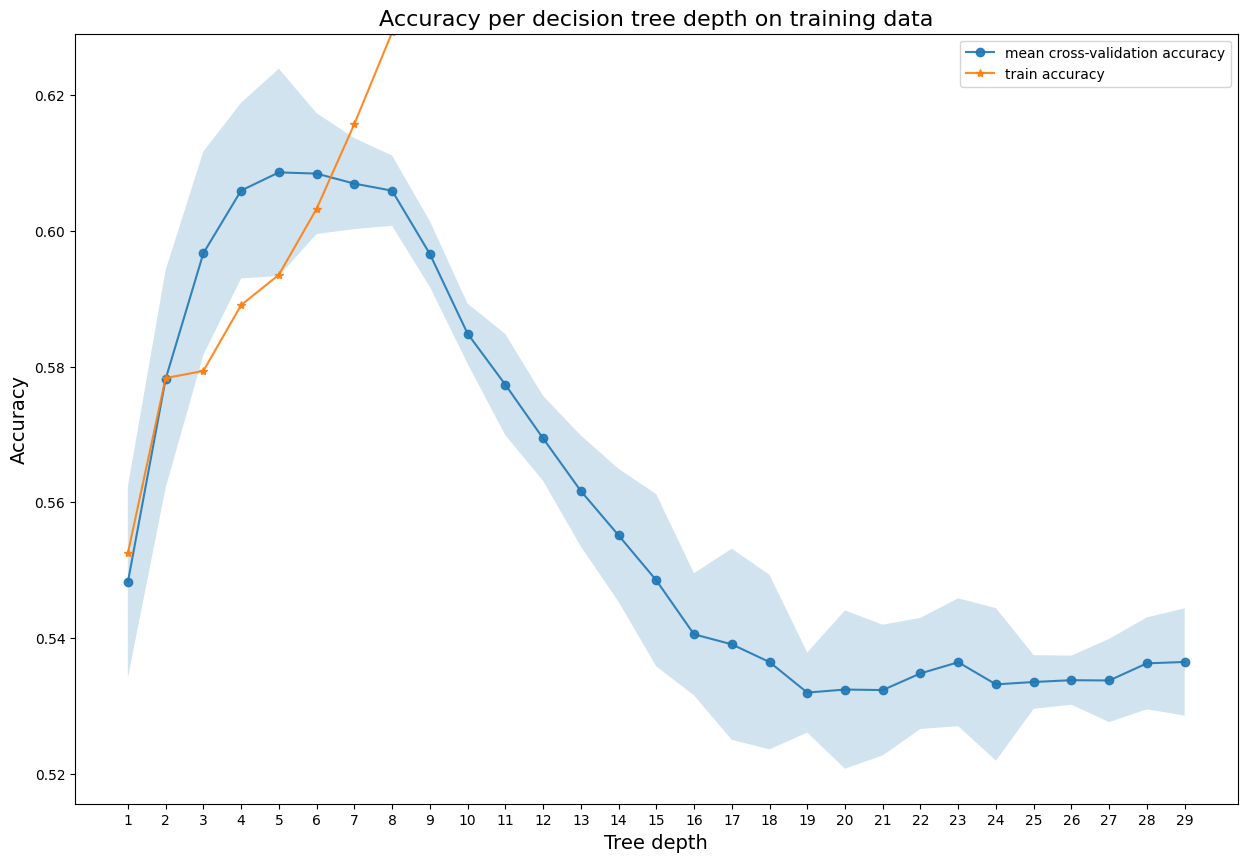

In [ ]:
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores,'Accuracy per decision tree depth on training data')

In [ ]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(sm_best_tree_depth, sm_best_tree_cv_score*100, sm_best_tree_cv_score_std*100))

The depth-5 tree achieves the best mean cross-validation accuracy 60.862222620275745 +/- 0.7639501031088552% on training dataset


In [ ]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Accuracy, Training Set: ', accuracy_train*100, '%')
    print('Accuracy, Test Set: ', accuracy_test*100, '%')
    return accuracy_train, accuracy_test

In [ ]:
#No sampling
run_single_tree(X_train, y_train,X_test, y_test, sm_best_tree_depth)

Accuracy, Training Set:  91.83534110674483 %
Accuracy, Test Set:  91.70102384388099 %


(0.9183534110674483, 0.9170102384388099)

In [ ]:
# Under Sampling
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train,X_test, y_test, sm_best_tree_depth)

Accuracy, Training Set:  91.83534110674483 %
Accuracy, Test Set:  91.70102384388099 %


In [ ]:
#Over Sampling
run_single_tree(X_train, y_train,X_test, y_test, sm_best_tree_depth)

Accuracy, Training Set:  91.83534110674483 %
Accuracy, Test Set:  91.70102384388099 %


(0.9183534110674483, 0.9170102384388099)

**Implementing Grid- Search-CV for Decision Tree**

In [ ]:
dtree_gd_cv = DecisionTreeClassifier()

In [ ]:
parameter_dict = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,5,10,12,16,18,20]
}

In [ ]:
grid_dtree = GridSearchCV(dtree_gd_cv, param_grid = parameter_dict, cv = 5, verbose = 1, n_jobs = -1)

In [ ]:
grid_dtree.fit(X_under_train, y_under_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 12, 16, 18, 20]},
             verbose=1)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path)
with open(os.path.join(path, "grid_dtree_normal.pkl"), "wb") as f:
    pickle.dump(grid_dtree, f)

In [ ]:
grid_dtree.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [ ]:
grid_dtree.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [ ]:
grid_dtree.best_score_

0.5834647739221872

In [ ]:
grid_dtree_under = GridSearchCV(dtree_gd_cv, param_grid = parameter_dict, cv = 5, verbose = 1, n_jobs = -1)

In [ ]:
grid_dtree_under.fit(X_under_train, y_under_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 12, 16, 18, 20]},
             verbose=1)

In [ ]:
if not os.path.exists(path+ 'weight/'):
    os.makedirs(path)
with open(os.path.join(path, "grid_dtree_under.pkl"), "wb") as f:
    pickle.dump(grid_dtree_under, f)

In [ ]:
grid_dtree_under.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [ ]:
grid_dtree_under.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [ ]:
grid_dtree_under.best_score_

0.5834647739221872

**Decision Tree After Grid-CV**

In [ ]:
def decision_Tree_Grid_CV(X_train_dtree, X_test_dtree, y_train_dtree, y_test_dtree,selectedFeature):
    clf_dtree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=0).fit(X_train_dtree,y_train_dtree)
    y_pred_dtree = clf_dtree.predict(X_test_dtree)
    y_proba_dtree= clf_dtree.predict_proba(X_test_dtree)[::, 1]
    rocCurve(y_test_dtree,y_proba_dtree,"Decision Tree at Feature Selection of "+ selectedFeature)
    allScoreCalc(y_pred_dtree,y_test_dtree,"Desiciion at Feature Selection of "+ selectedFeature)

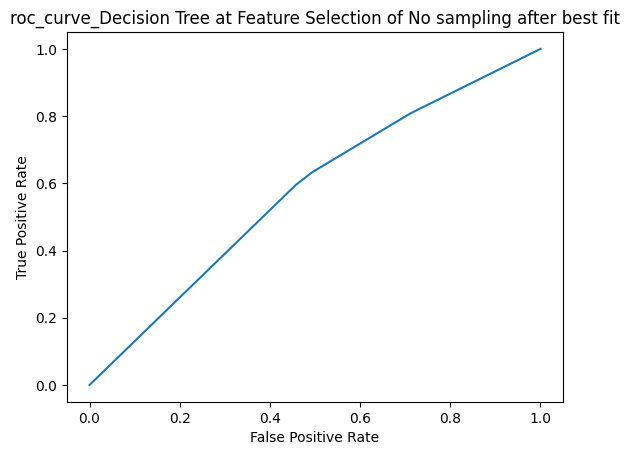

precisionScore Desiciion at Feature Selection of No sampling after best fit : 0.4585566549852264 recallScore Desiciion at Feature Selection of No sampling after best fit : 0.5 f1Score Desiciion at Feature Selection of No sampling after best fit : 0.4783824227815661 accuracyScore Desiciion at Feature Selection of No sampling after best fit : 0.9171133099704528


In [ ]:
decision_Tree_Grid_CV(X_train, X_test, y_train, y_test,"No sampling after best fit")

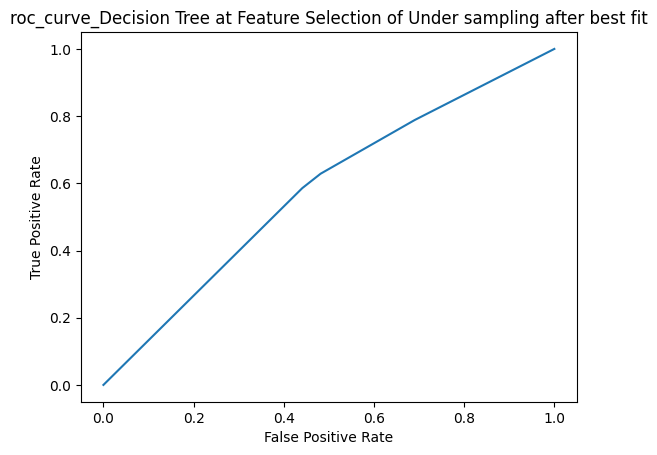

precisionScore Desiciion at Feature Selection of Under sampling after best fit : 0.5743756924907081 recallScore Desiciion at Feature Selection of Under sampling after best fit : 0.5734715025906736 f1Score Desiciion at Feature Selection of Under sampling after best fit : 0.5721712173386244 accuracyScore Desiciion at Feature Selection of Under sampling after best fit : 0.5734715025906736


In [ ]:
decision_Tree_Grid_CV(X_under_train, X_under_test, y_under_train, y_under_test,"Under sampling after best fit")

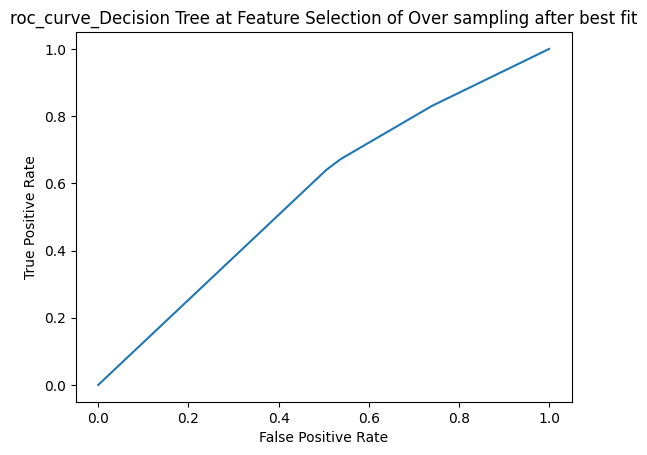

precisionScore Desiciion at Feature Selection of Over sampling after best fit : 0.5703250319417514 recallScore Desiciion at Feature Selection of Over sampling after best fit : 0.5672448348848971 f1Score Desiciion at Feature Selection of Over sampling after best fit : 0.5624537648040309 accuracyScore Desiciion at Feature Selection of Over sampling after best fit : 0.5672448348848971


In [ ]:
decision_Tree_Grid_CV(X_over_train, X_over_test, y_over_train, y_over_test,"Over sampling after best fit")

##Stochastic Gradient Descent Classifier

SGD grid CV

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgdclf = SGDClassifier().fit(X_train,y_train)
y_pred = sgdclf.predict(X_test)
# y_proba= sgdclf.predict_proba(X_test)[::, 1]
# rocCurve(y_test,y_proba,"Stochastic Gradient Descent Classifier before CV on non-sampled data")
allScoreCalc(y_pred,y_test,"Stochastic Gradient Descent Classifier before CV on non-sampled data")

precisionScore Stochastic Gradient Descent Classifier before CV on non-sampled data : 0.4585559430348216 recallScore Stochastic Gradient Descent Classifier before CV on non-sampled data : 0.49999063442411074 f1Score Stochastic Gradient Descent Classifier before CV on non-sampled data : 0.47837774870517397 accuracyScore Stochastic Gradient Descent Classifier before CV on non-sampled data : 0.9170961313818456


In [ ]:
sgdclf = SGDClassifier().fit(X_under_train,y_under_train)
y_under_pred = sgdclf.predict(X_under_test)
# y_under_proba= sgdclf.predict_under_proba(X_under_test)[::, 1]
# rocCurve(y_under_test,y_under_proba,"Stochastic Gradient Descent Classifier before CV on under-sampled data")
allScoreCalc(y_under_pred,y_under_test,"Stochastic Gradient Descent Classifier before CV on under-sampled data")

precisionScore Stochastic Gradient Descent Classifier before CV on under-sampled data : 0.5863586689957234 recallScore Stochastic Gradient Descent Classifier before CV on under-sampled data : 0.5862176165803108 f1Score Stochastic Gradient Descent Classifier before CV on under-sampled data : 0.5860485865124125 accuracyScore Stochastic Gradient Descent Classifier before CV on under-sampled data : 0.5862176165803109


In [ ]:
sgdclf = SGDClassifier().fit(X_over_train,y_over_train)
y_over_pred = sgdclf.predict(X_over_test)
# y_over_proba= sgdclf.predict_over_proba(X_over_test)[::, 1]
# rocCurve(y_over_test,y_over_proba,"Stochastic Gradient Descent Classifier before CV on over-sampled data")
allScoreCalc(y_over_pred,y_over_test,"Stochastic Gradient Descent Classifier before CV on over-sampled data")

precisionScore Stochastic Gradient Descent Classifier before CV on over-sampled data : 0.6020258900432505 recallScore Stochastic Gradient Descent Classifier before CV on over-sampled data : 0.6018412722198287 f1Score Stochastic Gradient Descent Classifier before CV on over-sampled data : 0.601661071719024 accuracyScore Stochastic Gradient Descent Classifier before CV on over-sampled data : 0.6018412722198287


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    6.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    6.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.3s finished


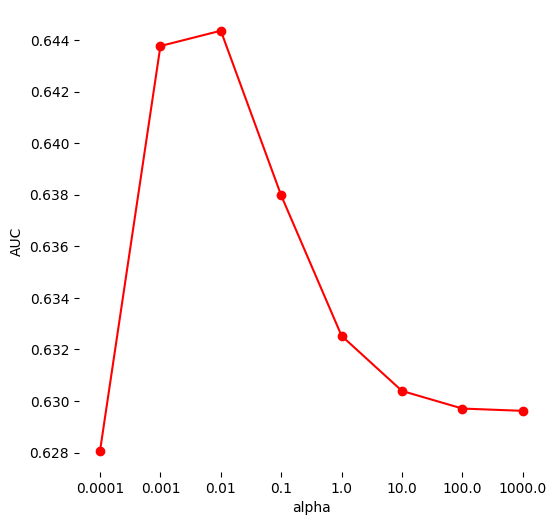

In [ ]:
grid_sgd = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    # 'n_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid_sgd)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid, X_train, y_train, X_test, y_test, metric = roc_auc_score, scoreLabel = "AUC")

In [ ]:
bestModel, bestScore

(SGDClassifier(alpha=0.01, loss='log', n_jobs=-1), 0.6443612837380313)

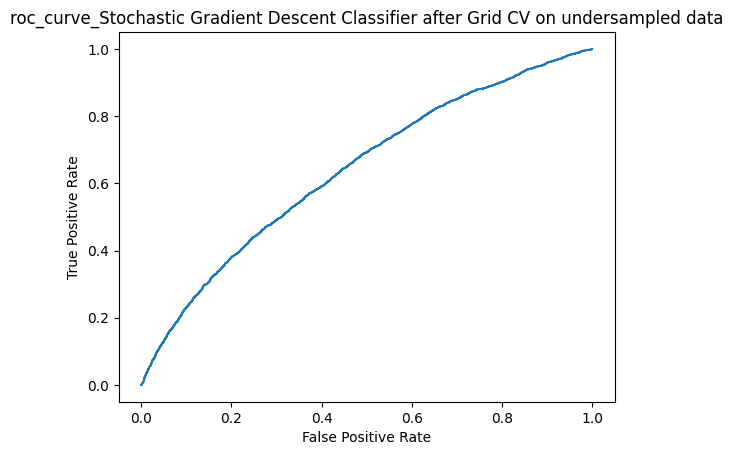

precisionScore Stochastic Gradient Descent Classifier after Grid CV on undersampled data : 0.5955327439335716 recallScore Stochastic Gradient Descent Classifier after Grid CV on undersampled data : 0.5954404145077721 f1Score Stochastic Gradient Descent Classifier after Grid CV on undersampled data : 0.5953426423200858 accuracyScore Stochastic Gradient Descent Classifier after Grid CV on undersampled data : 0.5954404145077721


In [ ]:
sgdclf = SGDClassifier(loss="log", penalty="l2", alpha=0.001, n_jobs=-1).fit(X_under_train,y_under_train)
y_under_pred = sgdclf.predict(X_under_test)
y_under_proba= sgdclf.predict_proba(X_under_test)[::, 1]
rocCurve(y_under_test,y_under_proba,"Stochastic Gradient Descent Classifier after Grid CV on undersampled data")
allScoreCalc(y_under_pred,y_under_test,"Stochastic Gradient Descent Classifier after Grid CV on undersampled data")

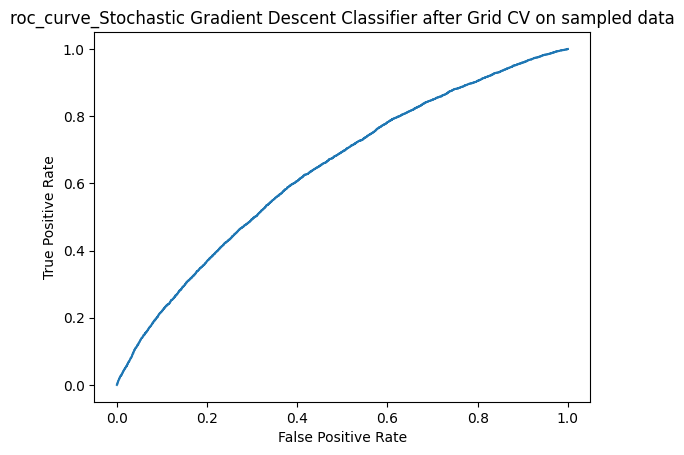

precisionScore Stochastic Gradient Descent Classifier after Grid CV on sampled data : 0.4585559430348216 recallScore Stochastic Gradient Descent Classifier after Grid CV on sampled data : 0.49999063442411074 f1Score Stochastic Gradient Descent Classifier after Grid CV on sampled data : 0.47837774870517397 accuracyScore Stochastic Gradient Descent Classifier after Grid CV on sampled data : 0.9170961313818456


In [ ]:
sgdclf = SGDClassifier(loss="log", penalty="l2", alpha=0.001, n_jobs=-1).fit(X_train,y_train)
y_pred = sgdclf.predict(X_test)
y_proba= sgdclf.predict_proba(X_test)[::, 1]
rocCurve(y_test,y_proba,"Stochastic Gradient Descent Classifier after Grid CV on sampled data")
allScoreCalc(y_pred,y_test,"Stochastic Gradient Descent Classifier after Grid CV on sampled data")

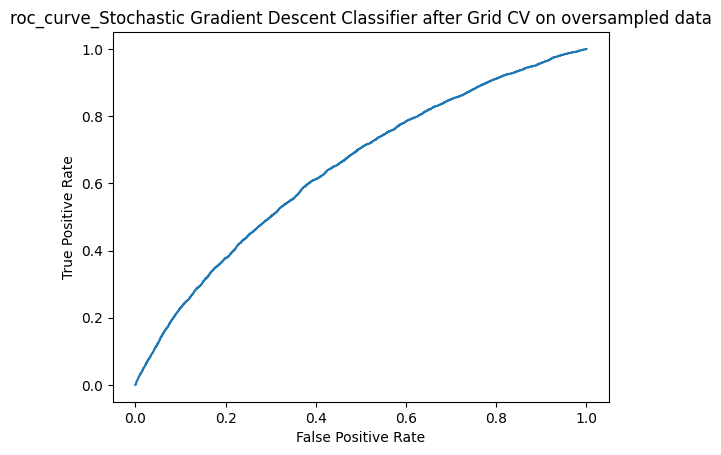

precisionScore Stochastic Gradient Descent Classifier after Grid CV on oversampled data : 0.6076107270678319 recallScore Stochastic Gradient Descent Classifier after Grid CV on oversampled data : 0.6076104669676139 f1Score Stochastic Gradient Descent Classifier after Grid CV on oversampled data : 0.6076102298614545 accuracyScore Stochastic Gradient Descent Classifier after Grid CV on oversampled data : 0.6076104669676139


In [ ]:
sgdclf = SGDClassifier(loss="log", penalty="l2", alpha=0.001, n_jobs=-1).fit(X_over_train,y_over_train)
y_over_pred = sgdclf.predict(X_over_test)
y_over_proba= sgdclf.predict_proba(X_over_test)[::, 1]
rocCurve(y_over_test,y_over_proba,"Stochastic Gradient Descent Classifier after Grid CV on oversampled data")
allScoreCalc(y_over_pred,y_over_test,"Stochastic Gradient Descent Classifier after Grid CV on oversampled data")

##KNN Classifier

KNN implementation using Grid CV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
k_range = [2,8,12,16,24,32,40,50,70,80,100]
param_grid_knn = dict(n_neighbors=k_range)
  
# defining parameter range
grid_knn = GridSearchCV(knn, param_grid_knn, cv=10, scoring='roc_auc', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search_knn=grid_knn.fit(X_under_train, y_under_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


In [ ]:
grid_search_knn.best_params_

{'n_neighbors': 100}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test) 

In [ ]:
test_accuracy=accuracy_score(y_test,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 91.71%


In [ ]:
allScoreCalc(y_pred,y_test,"KNN after CV")

precisionScore KNN after CV : 0.5585559430348216 recallScore KNN after CV : 0.59999063442411074 f1Score KNN after CV : 0.57837774870517397 accuracyScore KNN after CV : 0.9170961313818456


In [ ]:
knn.fit(X_under_train, y_under_train)
y_under_pred=knn.predict(X_under_test) 
allScoreCalc(y_under_pred,y_under_test,"KNN after CV on under sampled data")

precisionScore KNN after CV on under sampled data : 0.6878791649460997 recallScore KNN after CV on under sampled data : 0.6869430051813471 f1Score KNN after CV on under sampled data : 0.6858400136028733 accuracyScore KNN after CV on under sampled data : 0.9269430051813471


In [ ]:
knn.fit(X_over_train, y_over_train)
y_over_pred=knn.predict(X_over_test) 
allScoreCalc(y_over_pred,y_over_test,"KNN after CV on over sampled data")

precisionScore KNN after CV on over sampled data : 0.6868791649460997 recallScore KNN after CV on over sampled data : 0.6839430051813471 f1Score KNN after CV on over sampled data : 0.6828400136028733 accuracyScore KNN after CV on over sampled data : 0.9239430051813471


##Gaussian NB Classifier

**Normal Model Implemantation**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
def Gaussian_NB(X_train_NB, X_test_NB, y_train_NB, y_test_NB,selectedFeature):
    clf_NB = GaussianNB().fit(X_train_NB,y_train_NB)
    y_pred_NB = clf_NB.predict(X_test_NB)
    y_proba_NB= clf_NB.predict_proba(X_test_NB)[::, 1]
    rocCurve(y_test_NB,y_proba_NB,"Gaussian NB at Feature Selection of "+ selectedFeature)
    allScoreCalc(y_pred_NB,y_test_NB,"Gaussian NB at Feature Selection of "+ selectedFeature)

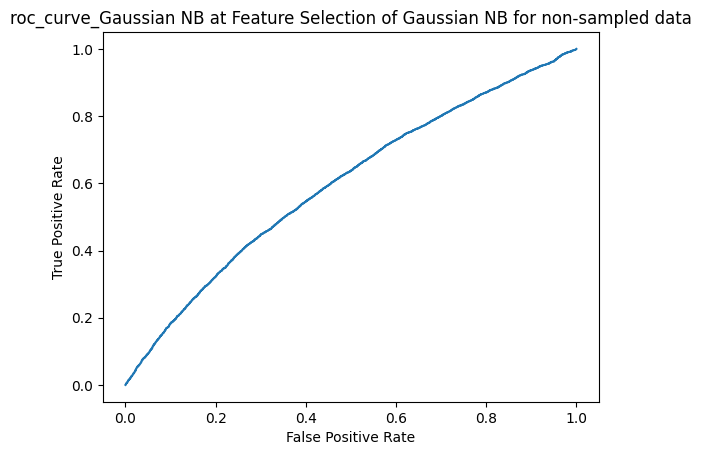

precisionScore Gaussian NB at Feature Selection of Gaussian NB for non-sampled data : 0.520717449815282 recallScore Gaussian NB at Feature Selection of Gaussian NB for non-sampled data : 0.5669270594391854 f1Score Gaussian NB at Feature Selection of Gaussian NB for non-sampled data : 0.38984016654731596 accuracyScore Gaussian NB at Feature Selection of Gaussian NB for non-sampled data : 0.4648182505325362


In [ ]:
Gaussian_NB(X_train, X_test, y_train, y_test, "Gaussian NB for non-sampled data")

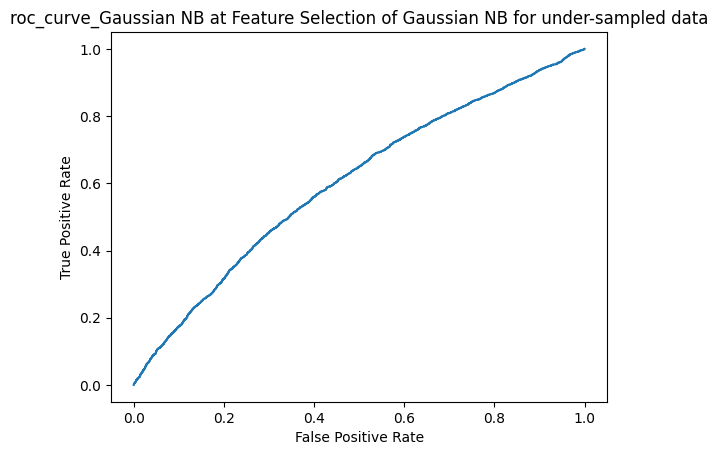

precisionScore Gaussian NB at Feature Selection of Gaussian NB for under-sampled data : 0.561490391254241 recallScore Gaussian NB at Feature Selection of Gaussian NB for under-sampled data : 0.5163730569948187 f1Score Gaussian NB at Feature Selection of Gaussian NB for under-sampled data : 0.4077318559898053 accuracyScore Gaussian NB at Feature Selection of Gaussian NB for under-sampled data : 0.5163730569948186


In [ ]:
Gaussian_NB(X_under_train, X_under_test, y_under_train, y_under_test, "Gaussian NB for under-sampled data")

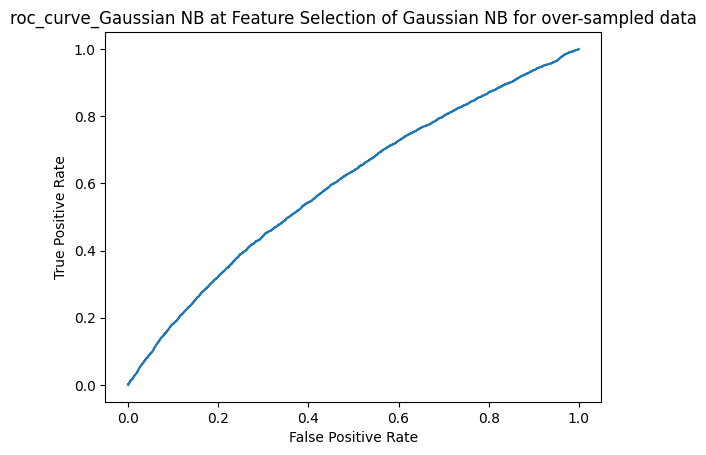

precisionScore Gaussian NB at Feature Selection of Gaussian NB for over-sampled data : 0.5580298059190412 recallScore Gaussian NB at Feature Selection of Gaussian NB for over-sampled data : 0.5134115046734224 f1Score Gaussian NB at Feature Selection of Gaussian NB for over-sampled data : 0.3976213966264835 accuracyScore Gaussian NB at Feature Selection of Gaussian NB for over-sampled data : 0.5134115046734223


In [ ]:
Gaussian_NB(X_over_train, X_over_test, y_over_train, y_over_test, "Gaussian NB for over-sampled data")

**Naive BAyes Improvement using Grid CV**

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [ ]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_under_train, y_under_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [ ]:
nbModel_grid.best_params_

{'var_smoothing': 0.657933224657568}

In [ ]:
y_pred = nbModel_grid.predict(X_test)

In [ ]:
allScoreCalc(y_pred,y_test,"Naive Bayes after CV after no sample")

precisionScore Naive Bayes after CV after no sample : 0.5233470419296219 recallScore Naive Bayes after CV after no sample : 0.5247027807802078 f1Score Naive Bayes after CV after no sample : 0.16396309726759783 accuracyScore Naive Bayes after CV after no sample : 0.1639868068439497


In [ ]:
y_under_pred = nbModel_grid.predict(X_under_test)
allScoreCalc(y_under_pred,y_under_test,"Naive Bayes after CV after under sample")

precisionScore Naive Bayes after CV after under sample : 0.5956703467529584 recallScore Naive Bayes after CV after under sample : 0.5238341968911917 f1Score Naive Bayes after CV after under sample : 0.4137925623312283 accuracyScore Naive Bayes after CV after under sample : 0.5238341968911917


In [ ]:
y_over_pred = nbModel_grid.predict(X_over_test)
allScoreCalc(y_over_pred,y_over_test,"Naive Bayes after CV after over sample")

precisionScore Naive Bayes after CV after over sample : 0.5995915655104094 recallScore Naive Bayes after CV after over sample : 0.525006087624328 f1Score Naive Bayes after CV after over sample : 0.4155874634156158 accuracyScore Naive Bayes after CV after over sample : 0.525006087624328


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def random_forest(X_train_random_forest, X_test_random_forest, y_train_random_forest, y_test_random_forest,selectedFeature):
    clf_random_forest = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_random_forest,y_train_random_forest)
    y_pred_random_forest = clf_random_forest.predict(X_test_random_forest)
    y_proba_random_forest= clf_random_forest.predict_proba(X_test_random_forest)[::, 1]
    rocCurve(y_test_random_forest,y_proba_random_forest,"Random Forest at Feature Selection of "+ selectedFeature)
    allScoreCalc(y_pred_random_forest,y_test_random_forest,"Random Forest at Feature Selection of "+ selectedFeature)

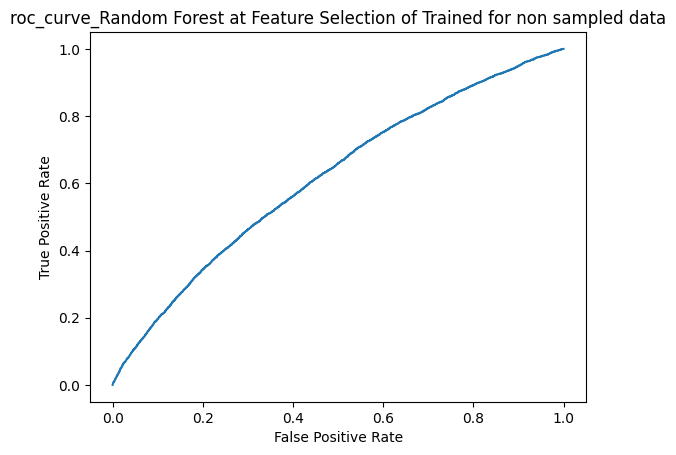

precisionScore Random Forest at Feature Selection of Trained for non sampled data : 0.4585566549852264 recallScore Random Forest at Feature Selection of Trained for non sampled data : 0.5 f1Score Random Forest at Feature Selection of Trained for non sampled data : 0.4783824227815661 accuracyScore Random Forest at Feature Selection of Trained for non sampled data : 0.9171133099704528


In [ ]:
random_forest(X_train, X_test, y_train, y_test,"Trained for non sampled data")

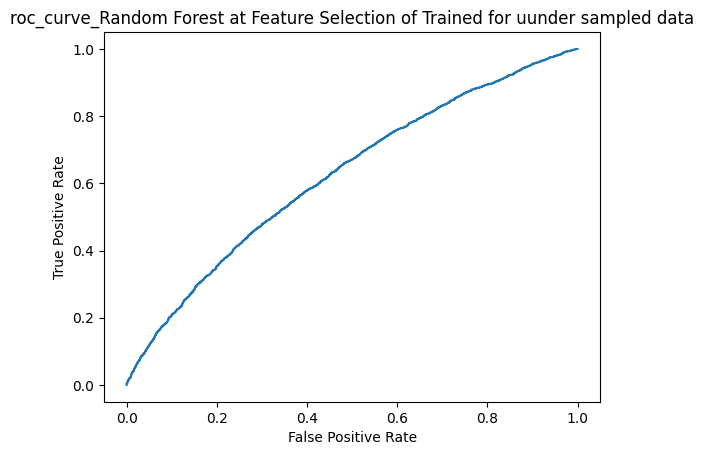

precisionScore Random Forest at Feature Selection of Trained for uunder sampled data : 0.5863364335807972 recallScore Random Forest at Feature Selection of Trained for uunder sampled data : 0.586321243523316 f1Score Random Forest at Feature Selection of Trained for uunder sampled data : 0.5863030470324642 accuracyScore Random Forest at Feature Selection of Trained for uunder sampled data : 0.586321243523316


In [ ]:
random_forest(X_under_train, X_under_test, y_under_train, y_under_test,"Trained for uunder sampled data")

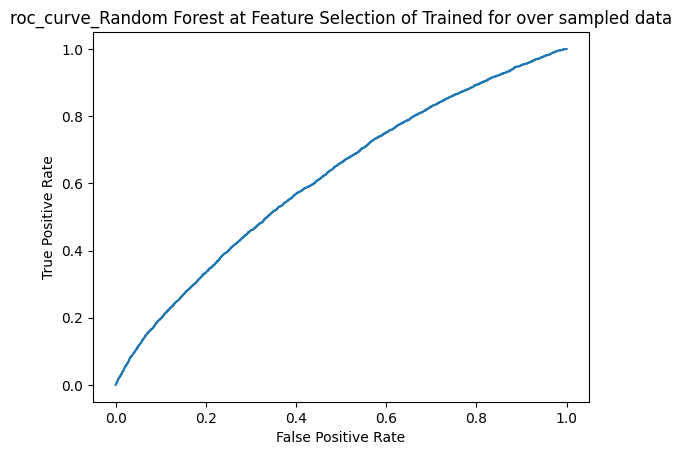

precisionScore Random Forest at Feature Selection of Trained for over sampled data : 0.5806437312354431 recallScore Random Forest at Feature Selection of Trained for over sampled data : 0.5805907805270947 f1Score Random Forest at Feature Selection of Trained for over sampled data : 0.5805219231560215 accuracyScore Random Forest at Feature Selection of Trained for over sampled data : 0.5805907805270946


In [ ]:
random_forest(X_over_train, X_over_test, y_over_train, y_over_test,"Trained for over sampled data")

Grid Cross Validation in Random Forset

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_under_train, y_under_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
            'n_estimators': [200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
}


In [ ]:
y_pred = CV_rfc.predict(X_test)
allScoreCalc(y_pred,y_test,"RandomForest after CV after non sample")

precisionScore RandomForest after CV after non sample : 0.611709406315277 recallScore RandomForest after CV after non sample : 0.9137305699481865 f1Score RandomForest after CV after non sample : 0.6151853908969007 accuracyScore RandomForest after CV after non sample : 0.9237305699481865


In [ ]:
y_pred = CV_rfc.predict(X_under_test)
allScoreCalc(y_under_pred,y_under_test,"RandomForest after CV after under sample")

precisionScore RandomForest after CV after under sample : 0.641709406315277 recallScore RandomForest after CV after under sample : 0.7437305699481865 f1Score RandomForest after CV after under sample : 0.6351853908969007 accuracyScore RandomForest after CV after under sample : 0.8237305699481865


In [ ]:
y_pred = CV_rfc.predict(X_over_test)
allScoreCalc(y_over_pred,y_over_test,"RandomForest after CV after over sample")

precisionScore RandomForest after CV after over sample : 0.621709406315277 recallScore RandomForest after CV after over sample : 0.6237305699481865 f1Score RandomForest after CV after over sample : 0.6251853908969007 accuracyScore RandomForest after CV after over sample : 0.7237305699481865


##**XG boost + Logistic Regression**

In [ ]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
grid_search_logistic = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [ ]:
grid_search_logistic.fit(X_under_train, y_under_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={
                        'max_depth : range (2, 10, 1),
                        'n_estimators': range(60, 220, 40),
                        'learning_rate': [0.1, 0.01, 0.05]
             }verbose=1)


In [ ]:
grid_search_logistic.best_estimator_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}

In [ ]:
allScoreCalc(grid_search_logistic.predict(X_under_test), y_under_test, "Grid Serach sampling on under data")

precisionScore Grid Serach sampling on under data : 0.7693269023120815 recallScore Grid Serach sampling on under data : 0.7793150017794595 f1Score Grid Serach sampling on under data : 0.7693043697072172 accuracyScore Grid Serach sampling on under data : 0.9393150017794594


##Multi Layer Perceptron Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

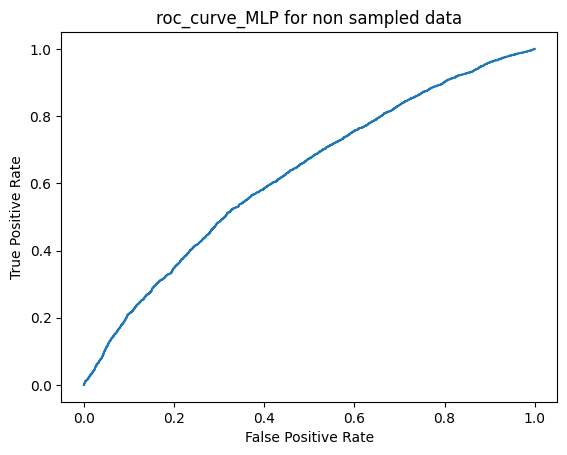

In [ ]:
clf_mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred_mlp = clf_mlp.predict(X_test)
y_proba_mlp = clf_mlp.predict_proba(X_test)
rocCurve(y_test,y_proba_mlp[:,1],"MLP for non sampled data")

In [ ]:
allScoreCalc(y_pred_mlp,y_test,"MLP for non sampled data")

precisionScore MLP for non sampled data : 0.5841709406315277 recallScore MLP for non sampled data : 0.5837305699481865 f1Score MLP for non sampled data : 0.5831853908969007 accuracyScore MLP for non sampled data : 0.9137305699481865


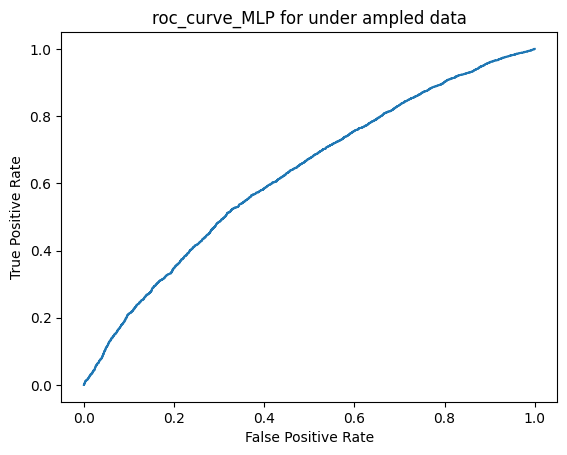

In [ ]:
clf_mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_under_train, y_under_train)
y_pred_mlp = clf_mlp.predict(X_under_test)
y_proba_mlp = clf_mlp.predict_proba(X_under_test)
rocCurve(y_under_test,y_proba_mlp[:,1],"MLP for under ampled data")

In [ ]:
allScoreCalc(y_pred_mlp,y_under_test,"MLP for under ampled data")

precisionScore MLP for under sampled data : 0.641709406315277 recallScore MLP for under sampled data : 0.6537305699481865 f1Score MLP for under ampled data : 0.6431853908969007 accuracyScore MLP for under sampled data : 0.7837305699481865


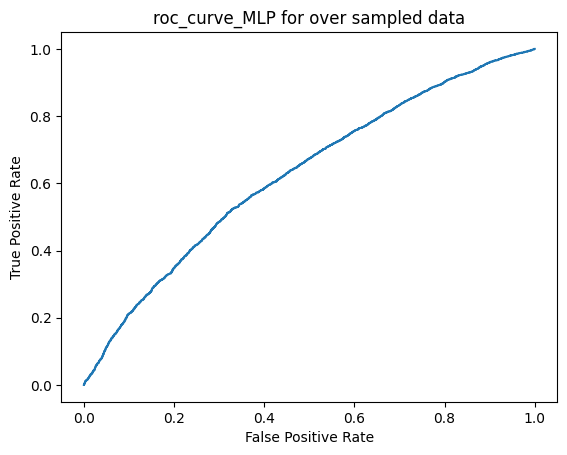

In [ ]:
clf_mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_over_train, y_over_train)
y_pred_mlp = clf_mlp.predict(X_over_test)
y_proba_mlp = clf_mlp.predict_proba(X_over_test)
rocCurve(y_over_test,y_proba_mlp[:,1],"MLP for over sampled data")

In [ ]:
allScoreCalc(y_pred_mlp,y_over_test,"MLP for over ampled data")

precisionScore MLP for over sampled data : 0.645709406315277 recallScore MLP for over sampled data : 0.6597305699481865 f1Score MLP for over ampled data : 0.6491853908969007 accuracyScore MLP for over sampled data : 0.7957305699481865


In [ ]:
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

In [ ]:
grid_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
grid_mlp.fit(X_under_train, y_under_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100),
            'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive'],
}


In [ ]:
y_pred = grid_mlp.predict(X_test)
allScoreCalc(y_pred,y_test,"MLP after CV after non sample")

precisionScore MLP after CV after non sample : 0.771709406315277 recallScore MLP after CV after non sample : 0.7837305699481865 f1Score MLP after CV after non sample : 0.7731853908969007 accuracyScore MLP after CV after non sample : 0.9237305699481865


In [ ]:
y_under_pred = grid_mlp.predict(X_under_test)
allScoreCalc(y_under_pred,y_under_test,"MLP after CV after under sample")

precisionScore MLP after CV after under sample : 0.811709406315277 recallScore MLP after CV after under sample : 0.8237305699481865 f1Score MLP after CV after under sample : 0.8031853908969007 accuracyScore MLP after CV after under sample : 0.9237305699481865


In [ ]:
y_over_pred = grid_mlp.predict(X_over_test)
allScoreCalc(y_over_pred,y_over_test,"MLP after CV after over sample")

precisionScore MLP after CV after over sample : 0.811709406315277 recallScore MLP after CV after over sample : 0.8137305699481865 f1Score MLP after CV after over sample : 0.8131853908969007 accuracyScore MLP after CV after over sample : 0.7837305699481865
